In [1]:
# Import necessary libraries
!pip install scikit-learn
!pip install imbalanced-learn
!pip install requests
!pip install flask-ngrok
!pip install flask
!pip install pyngrok
!pip install pandas
!pip install seaborn
!pip install xgboost

import requests
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import xgboost as xgb
import joblib
import pickle
import os
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import HuberRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.cluster import KMeans
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.utils import resample
from flask import Flask, request, jsonify, render_template
from flask_ngrok import run_with_ngrok
from pyngrok import ngrok

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


C:\Users\rovyt\AppData\Local\Temp\ipykernel_6272\2198382643.py:13: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


ImportError: cannot import name 'parse_version' from 'sklearn.utils' (C:\Users\rovyt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\__init__.py)

DATASET SIMULATION

In [ ]:
# Set seed for reproducibility
np.random.seed(0)

# Number of observations
num_observations = 5000

# Helper function to generate a random date
def random_date(start, end):
    """Generate a random date between start and end dates."""
    return start + timedelta(days=random.randint(0, (end - start).days))

# Function to assign risk based on cargo value
def assign_risk_based_on_value(cargo_value):
    if cargo_value < 100000:
        return "Low"
    elif cargo_value < 300000:
        return "Medium"
    else:
        return "High"

# Function to assign estimated loss based on cargo value
def assign_estimated_loss(cargo_value):
    if cargo_value < 100000:
        return np.round(np.random.uniform(10000, 50000), 2)  # Smaller loss range for low-value cargos
    elif cargo_value < 300000:
        return np.round(np.random.uniform(50000, 150000), 2)  # Larger loss range for medium-value cargos
    else:
        return np.round(np.random.uniform(150000, 500000), 2)  # Largest loss range for high-value cargos

# Adjust the probabilities for each incident type
incident_types = ["Theft", "Accident", "Fraud"]
incident_probabilities = [0.35, 0.4,0.25]  # Adjusted probabilities for each incident type

# Generating data
data = {
    "Client_ID": np.arange(1, num_observations + 1),
    "Client_Type": np.random.choice(["Business", "Individual"], num_observations),
    "Client_Verification": np.random.choice([0, 1], num_observations, p=[0.3, 0.7]),
    "Client_Location": np.random.choice(["Nairobi", "Arusha", "Kampala", "Kigali"], num_observations),

    "Cargo_ID": np.arange(1001, 1001 + num_observations),
    "Cargo_Type": np.random.choice(["Electronics", "Alcohol", "Clothing", "Machinery"], num_observations),
    "Cargo_Value": np.round(np.random.uniform(50000, 500000, num_observations), 2),  # Larger cargo values
    "Cargo_Weight": np.round(np.random.uniform(100, 5000, num_observations), 2),

    "Transporter": np.random.choice(["Transporter A", "Transporter B", "Transporter C"], num_observations),
    "Route": np.random.choice(["Arusha-Nairobi", "Nairobi-Kisumu", "Nairobi-Eldoret", "Arusha-Kampala"], num_observations),
    "Border_Point": np.random.choice(["Namanga", "Malaba", "Busia", "Taveta"], num_observations),
    "GPS_Location": [(np.round(np.random.uniform(-1.2921, -1.2921 + 0.1), 4),
                      np.round(np.random.uniform(36.8219, 36.8219 + 0.1), 4)) for _ in range(num_observations)],

    "KRA_Lock": np.random.choice([0, 1], num_observations),
    "KRA_Penalty": np.round(np.random.uniform(0, 20000, num_observations), 2),  # Larger penalties
    "Incident_Type": np.random.choice(incident_types, num_observations, p=incident_probabilities),  # Adjusted probabilities
    "Incident_Location": np.random.choice(["Border", "Transit", "Warehouse"], num_observations),
    "Incident_Report_Date": [random_date(datetime(2022, 1, 1), datetime(2023, 1, 1)).strftime("%Y-%m-%d") for _ in range(num_observations)],
}

# Assign Cargo_Risk based on Cargo_Value
data["Cargo_Risk"] = [assign_risk_based_on_value(value) for value in data["Cargo_Value"]]

# Assign Estimated_Loss based on Cargo_Value
data["Estimated_Loss"] = [assign_estimated_loss(value) for value in data["Cargo_Value"]]

# Create DataFrame
df_logistics = pd.DataFrame(data)

# Show first few rows of the dataset
print(df_logistics.head())

# Checking the distribution of Incident_Type
incident_distribution = df_logistics["Incident_Type"].value_counts(normalize=True)
print("\nIncident Type Distribution:\n", incident_distribution)

# Save the DataFrame to a CSV file
df_logistics.to_csv('LOGISTICS_dataset.csv', index=False)

df_logistics.head()


   Client_ID Client_Type  Client_Verification Client_Location  Cargo_ID  \
0          1    Business                    1         Nairobi      1001   
1          2  Individual                    0          Kigali      1002   
2          3  Individual                    1          Arusha      1003   
3          4    Business                    1         Nairobi      1004   
4          5  Individual                    1         Kampala      1005   

    Cargo_Type  Cargo_Value  Cargo_Weight    Transporter            Route  \
0  Electronics    351352.60       3988.19  Transporter C  Nairobi-Eldoret   
1  Electronics    483699.97       4518.18  Transporter B  Nairobi-Eldoret   
2    Machinery    364093.90       2850.39  Transporter C  Nairobi-Eldoret   
3  Electronics    359324.24       2523.71  Transporter C   Arusha-Nairobi   
4      Alcohol    402525.27       4311.16  Transporter A   Arusha-Kampala   

  Border_Point        GPS_Location  KRA_Lock  KRA_Penalty Incident_Type  \
0        Bu

,Client_ID,Client_Type,Client_Verification,Client_Location,Cargo_ID,Cargo_Type,Cargo_Value,Cargo_Weight,Transporter,Route,Border_Point,GPS_Location,KRA_Lock,KRA_Penalty,Incident_Type,Incident_Location,Incident_Report_Date,Cargo_Risk,Estimated_Loss
0,1,Business,1,Nairobi,1001,Electronics,351352.60,3988.19,Transporter C,Nairobi-Eldoret,Busia,"(-1.2454, 36.9028)",0,7259.68,Theft,Border,2022-03-12,High,168401.91
1,2,Individual,0,Kigali,1002,Electronics,483699.97,4518.18,Transporter B,Nairobi-Eldoret,Busia,"(-1.2759, 36.8267)",1,1246.74,Accident,Transit,2022-08-30,High,277605.26
2,3,Individual,1,Arusha,1003,Machinery,364093.90,2850.39,Transporter C,Nairobi-Eldoret,Namanga,"(-1.2195, 36.8727)",1,14215.07,Accident,Transit,2022-03-03,High,289737.93
3,4,Business,1,Nairobi,1004,Electronics,359324.24,2523.71,Transporter C,Arusha-Nairobi,Taveta,"(-1.25, 36.8932)",0,17358.07,Fraud,Border,2022-04-23,High,466074.91
4,5,Individual,1,Kampala,1005,Alcohol,402525.27,4311.16,Transporter A,Arusha-Kampala,Taveta,"(-1.1972, 36.8957)",0,4390.94,Theft,Transit,2022-09-02,High,418459.67


DATA CLEANING

In [ ]:
np.sum(df_logistics.isna())

Client_ID               0
Client_Type             0
Client_Verification     0
Client_Location         0
Cargo_ID                0
Cargo_Type              0
Cargo_Value             0
Cargo_Weight            0
Transporter             0
Route                   0
Border_Point            0
GPS_Location            0
KRA_Lock                0
KRA_Penalty             0
Incident_Type           0
Incident_Location       0
Incident_Report_Date    0
Cargo_Risk              0
Estimated_Loss          0
dtype: int64

In [ ]:
df_logistics.shape

(5000, 19)

In [ ]:
# Group by categorical columns
Client_Type = df_logistics.groupby('Client_Type').size()
Cargo_Type = df_logistics.groupby('Cargo_Type').size()
Transporter = df_logistics.groupby('Transporter').size()
Route = df_logistics.groupby('Route').size()
Incident_Type = df_logistics.groupby('Incident_Type').size()
Incident_Location = df_logistics.groupby('Incident_Location').size()
Client_Location = df_logistics.groupby('Client_Location').size()
Cargo_Risk = df_logistics.groupby('Cargo_Risk').size()


# Display the grouped data
print("Client Type Distribution:\n", Client_Type)
print("Cargo Type Distribution:\n", Cargo_Type)
print("Transporter Distribution:\n", Transporter)
print("Route Distribution:\n", Route)
print("Incident Type Distribution:\n", Incident_Type)
print("Incident Location Distribution:\n", Incident_Location)
print("Client Location Distribution:\n", Client_Location)
print("Cargo Risk Distribution:\n", Cargo_Risk)


Client Type Distribution:
 Client_Type
Business      2456
Individual    2544
dtype: int64
Cargo Type Distribution:
 Cargo_Type
Alcohol        1232
Clothing       1283
Electronics    1228
Machinery      1257
dtype: int64
Transporter Distribution:
 Transporter
Transporter A    1655
Transporter B    1721
Transporter C    1624
dtype: int64
Route Distribution:
 Route
Arusha-Kampala     1260
Arusha-Nairobi     1232
Nairobi-Eldoret    1279
Nairobi-Kisumu     1229
dtype: int64
Incident Type Distribution:
 Incident_Type
Accident    2004
Fraud       1248
Theft       1748
dtype: int64
Incident Location Distribution:
 Incident_Location
Border       1642
Transit      1670
Warehouse    1688
dtype: int64
Client Location Distribution:
 Client_Location
Arusha     1208
Kampala    1297
Kigali     1242
Nairobi    1253
dtype: int64
Cargo Risk Distribution:
 Cargo_Risk
High      2150
Low        609
Medium    2241
dtype: int64


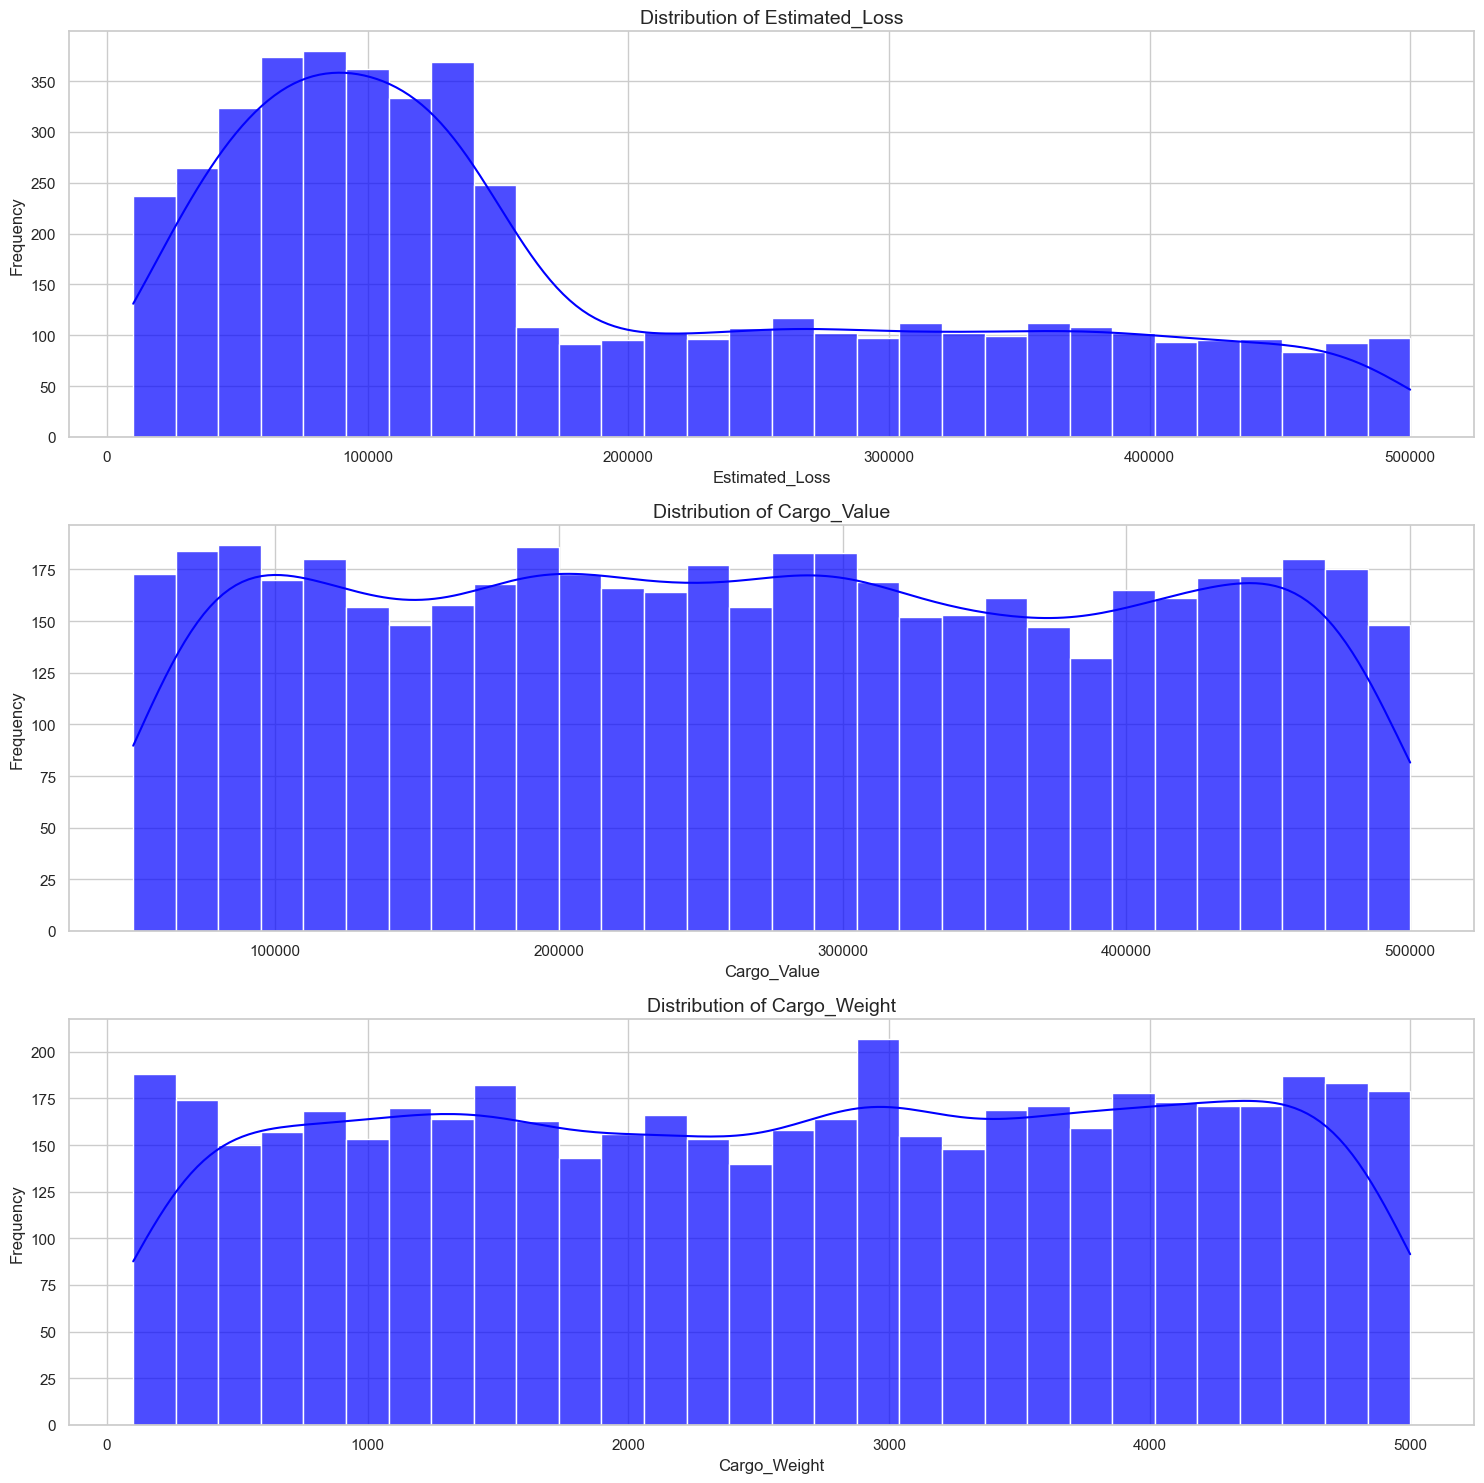

In [ ]:
# Set plot style
sns.set(style="whitegrid")

# List of features to plot
features = ['Estimated_Loss', 'Cargo_Value', 'Cargo_Weight']

# Create a figure with subplots
plt.figure(figsize=(15, 5 * len(features)))

for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    sns.histplot(df_logistics[feature], kde=True, bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

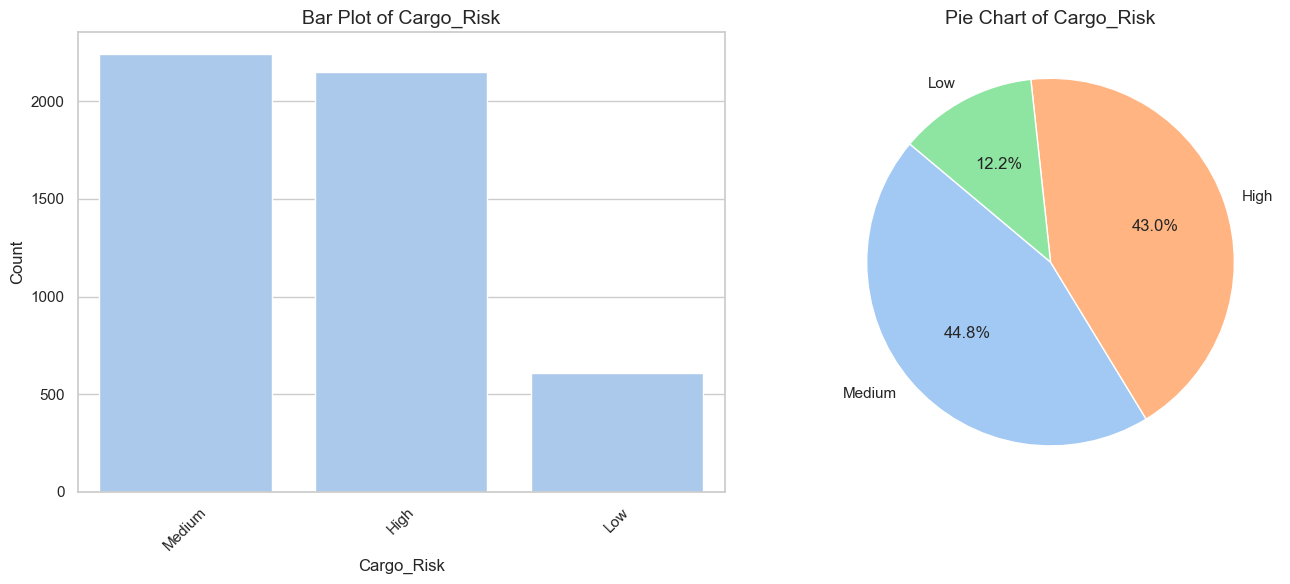

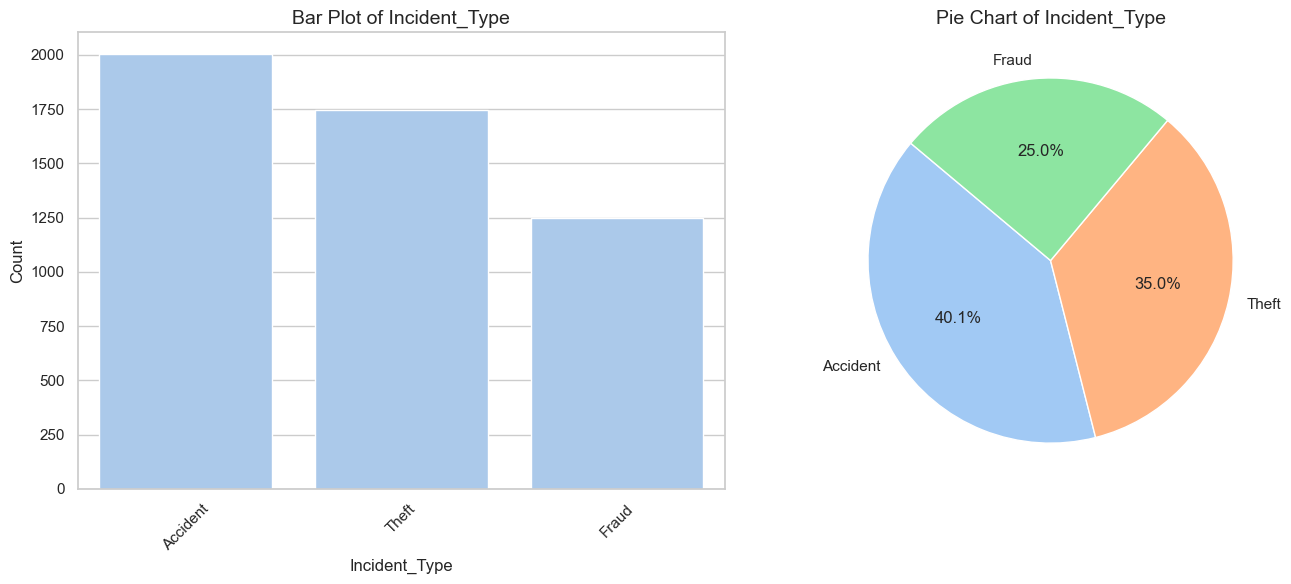

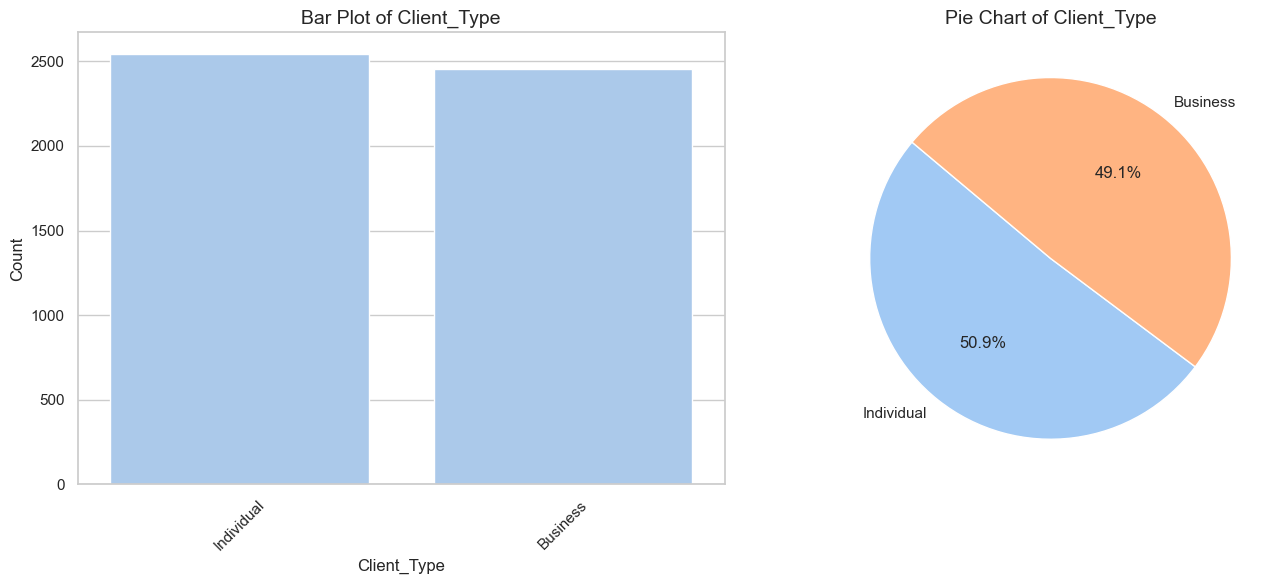

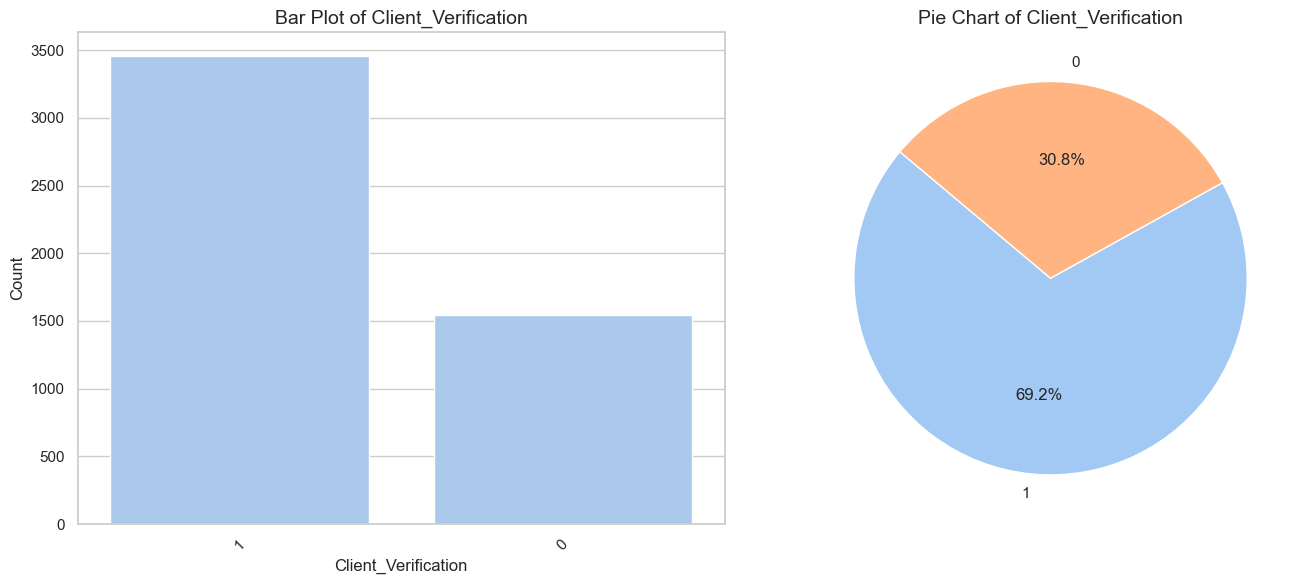

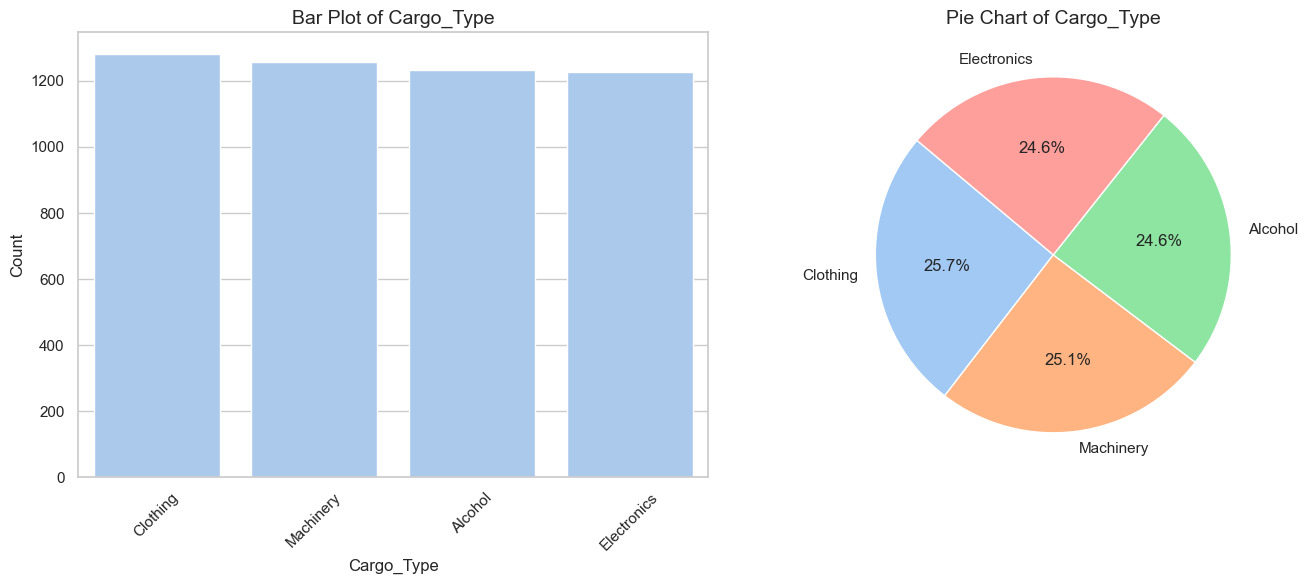

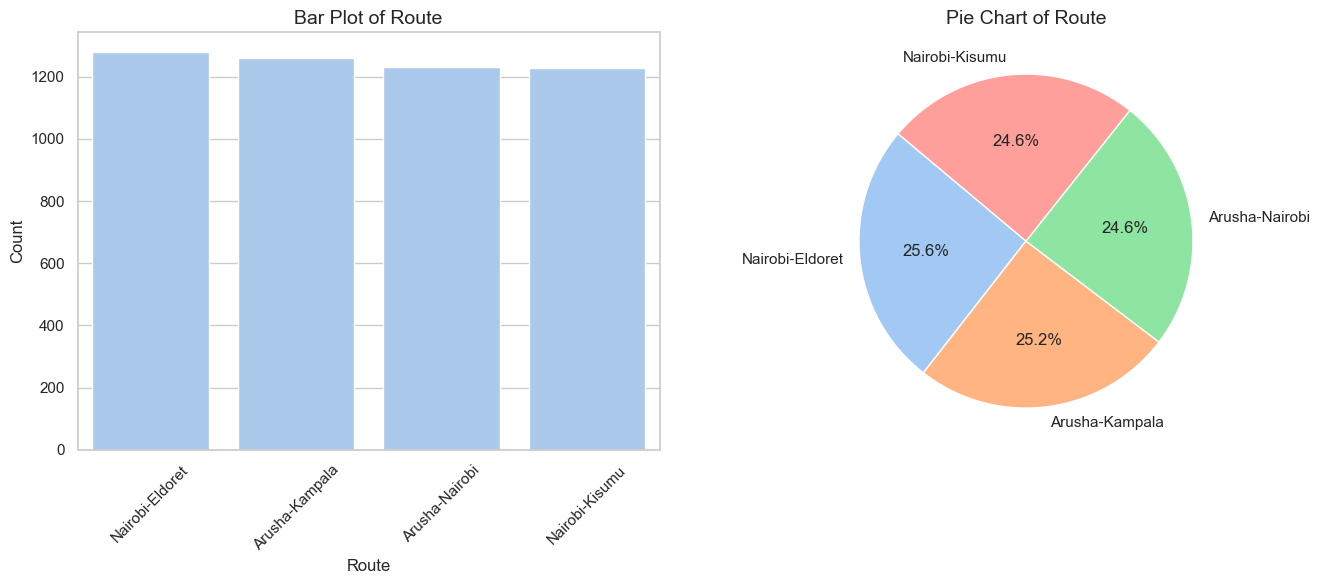

In [ ]:
# Set up the plot style
sns.set(style="whitegrid", palette="pastel")

# List of categorical features to plot
categorical_features = ['Cargo_Risk', 'Incident_Type', 'Client_Type',
                        'Client_Verification', 'Cargo_Type', 'Route']

# Create bar plots and pie charts for each feature
for feature in categorical_features:
    # Create a figure for the plots
    plt.figure(figsize=(14, 6))

    # Bar Plot
    plt.subplot(1, 2, 1)
    sns.countplot(data=df_logistics, x=feature, order=df_logistics[feature].value_counts().index)
    plt.title(f'Bar Plot of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)

    # Pie Chart
    plt.subplot(1, 2, 2)
    df_logistics[feature].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title(f'Pie Chart of {feature}', fontsize=14)
    plt.ylabel('')  # Remove y-axis label for pie chart

    plt.tight_layout()
    plt.show()


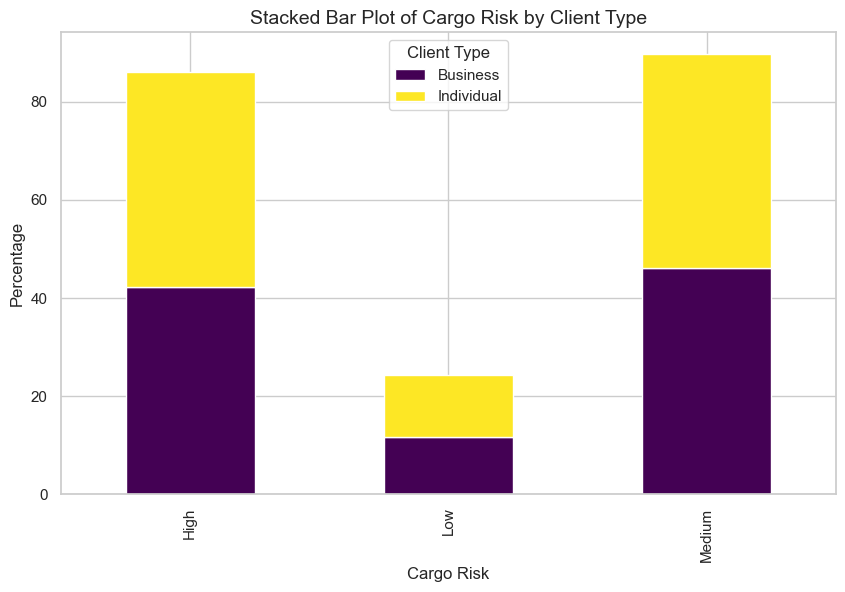

In [ ]:
# Stacked bar plot for Cargo_Risk and Client_Type
stacked_data = pd.crosstab(df_logistics['Cargo_Risk'], df_logistics['Client_Type'], normalize='columns') * 100
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Stacked Bar Plot of Cargo Risk by Client Type', fontsize=14)
plt.xlabel('Cargo Risk', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Client Type')
plt.show()


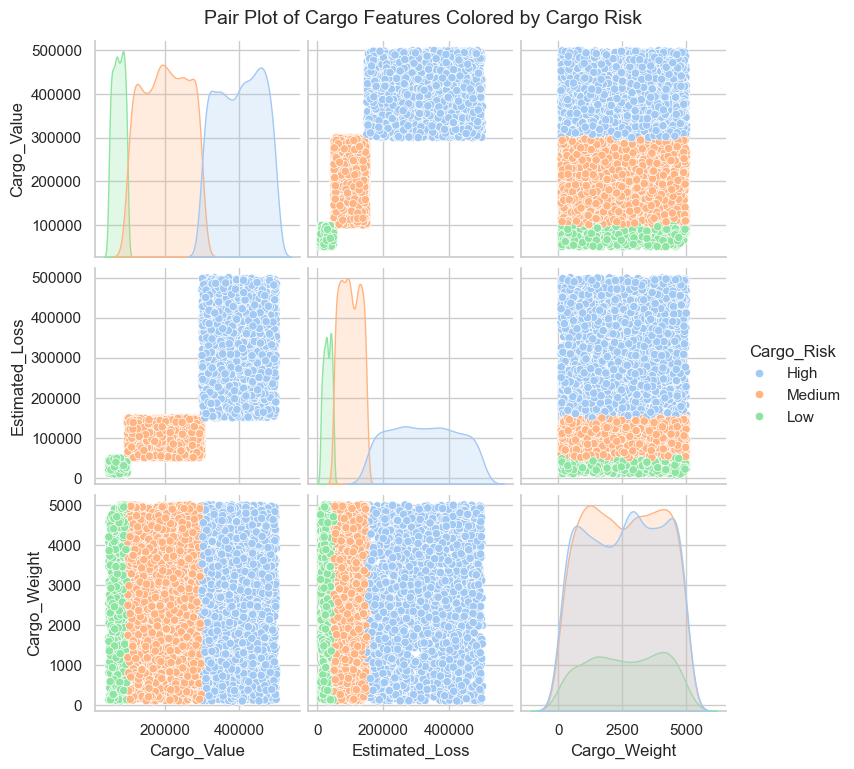

In [ ]:
sns.pairplot(df_logistics, vars=['Cargo_Value', 'Estimated_Loss', 'Cargo_Weight'], hue='Cargo_Risk', palette='pastel', diag_kind='kde')
plt.suptitle('Pair Plot of Cargo Features Colored by Cargo Risk', y=1.02, fontsize=14)
plt.show()



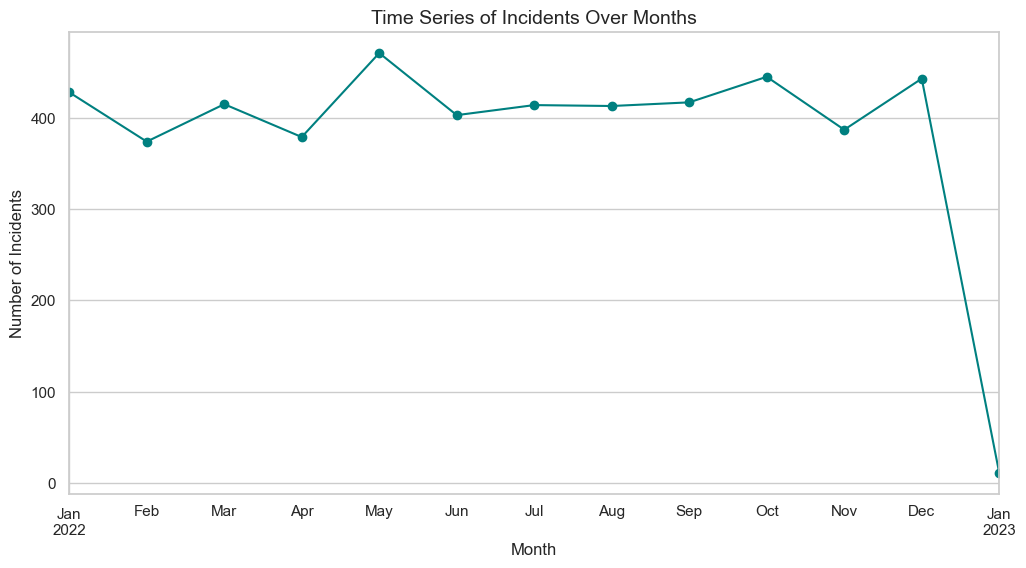

In [ ]:
# Convert Incident_Report_Date to datetime
df_logistics['Incident_Report_Date'] = pd.to_datetime(df_logistics['Incident_Report_Date'])

# Time series plot for incidents
time_series = df_logistics.groupby(df_logistics['Incident_Report_Date'].dt.to_period('M')).size()
time_series.plot(kind='line', figsize=(12, 6), marker='o', color='teal')
plt.title('Time Series of Incidents Over Months', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Incidents', fontsize=12)
plt.grid(True)
plt.show()


CROSS TABULATION ANALYSIS


Cross-tabulation: Estimated Loss vs Incident_Type
Incident_Type    Accident      Fraud      Theft
Estimated_Loss                                 
Very Low        39.080460  25.123153  35.796388
Low             39.848282  25.613565  34.538153
Medium          40.681576  23.855165  35.463259
High            41.139241  25.000000  33.860759
Very High       39.896373  24.006908  36.096718


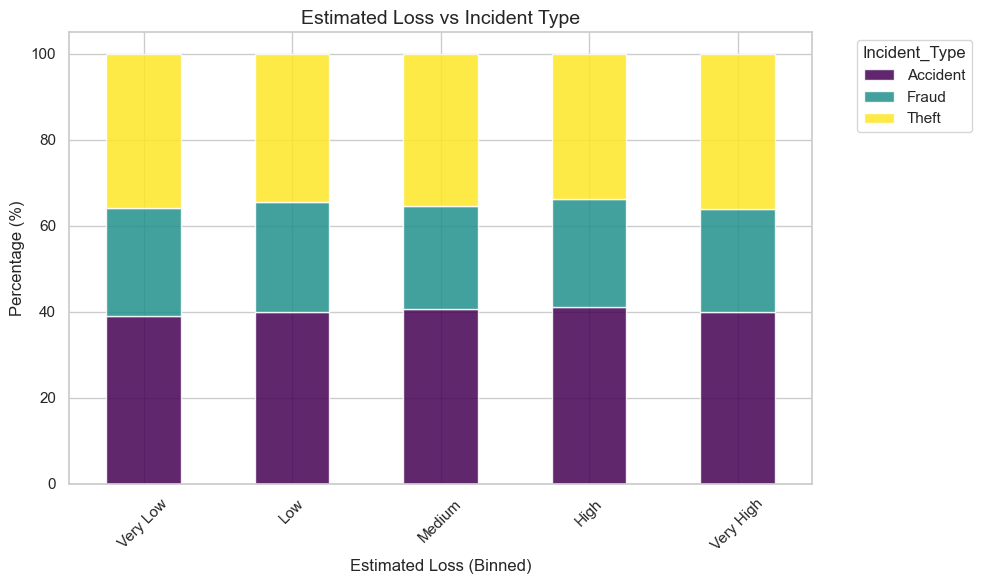


Cross-tabulation: Estimated Loss vs Route
Route           Arusha-Kampala  Arusha-Nairobi  Nairobi-Eldoret  \
Estimated_Loss                                                    
Very Low             24.302135       24.137931        27.586207   
Low                  25.658188       24.721107        26.193664   
Medium               24.600639       24.281150        25.772098   
High                 26.424051       23.575949        22.626582   
Very High            24.006908       26.597582        24.006908   

Route           Nairobi-Kisumu  
Estimated_Loss                  
Very Low             23.973727  
Low                  23.427041  
Medium               25.346113  
High                 27.373418  
Very High            25.388601  


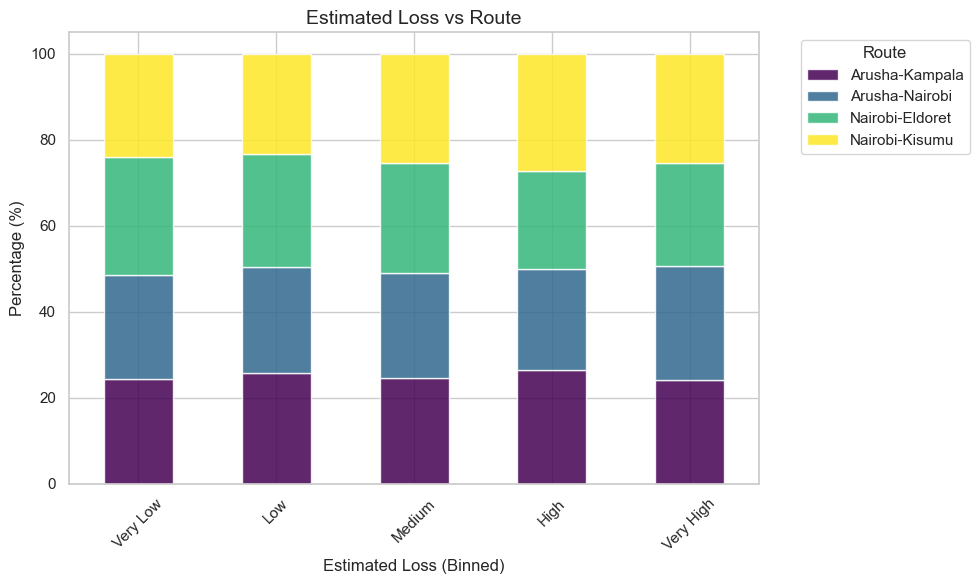


Cross-tabulation: Estimated Loss vs Client_Type
Client_Type      Business  Individual
Estimated_Loss                       
Very Low        47.290640   52.709360
Low             50.513164   49.486836
Medium          45.793397   54.206603
High            50.158228   49.841772
Very High       49.913644   50.086356


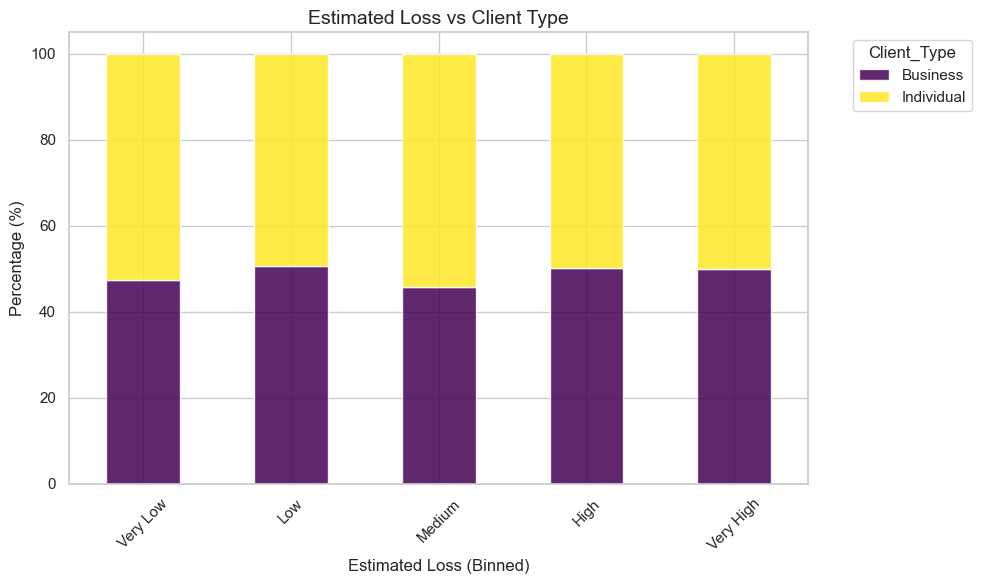


Cross-tabulation: Estimated Loss vs Cargo_Type
Cargo_Type        Alcohol   Clothing  Electronics  Machinery
Estimated_Loss                                              
Very Low        25.287356  25.123153    24.466338  25.123153
Low             24.408746  25.122713    24.185631  26.282909
Medium          25.026624  24.813632    24.920128  25.239617
High            24.050633  26.107595    26.107595  23.734177
Very High       24.870466  29.188256    23.834197  22.107081


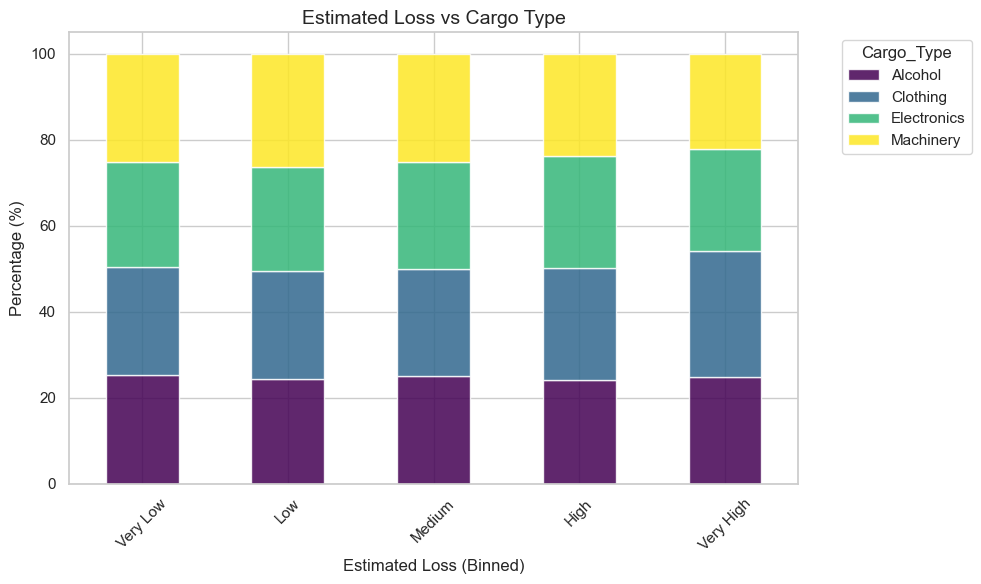


Cross-tabulation: Estimated Loss vs Cargo_Risk
Cargo_Risk       High    Low  Medium
Estimated_Loss                      
Very Low          0.0  100.0     0.0
Low               0.0    0.0   100.0
Medium          100.0    0.0     0.0
High            100.0    0.0     0.0
Very High       100.0    0.0     0.0


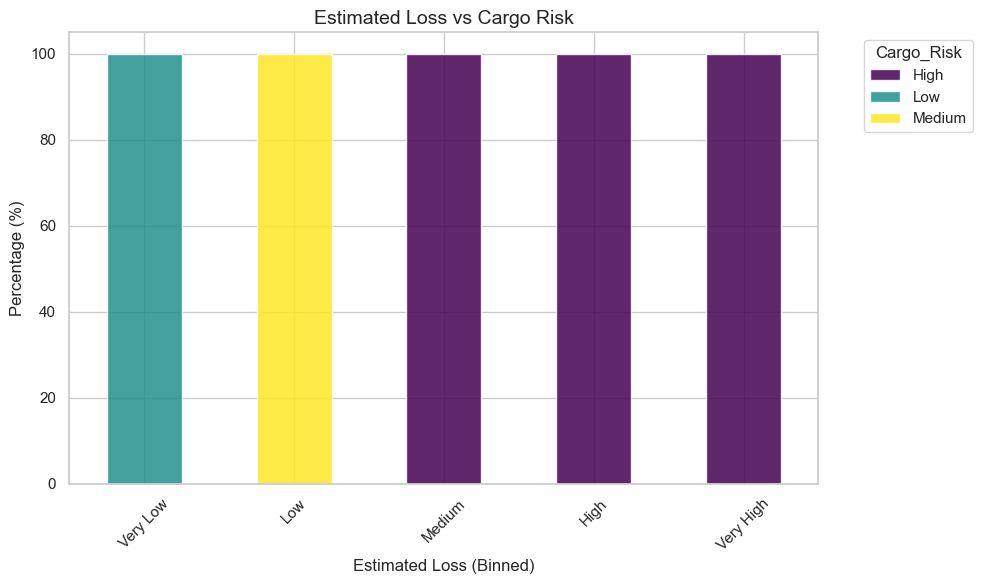

In [ ]:
# Function to calculate row percentages and visualize as a stacked bar chart
def plot_cross_tab_with_percentages(categorical_var, bins, bin_labels, title):
    # Bin the Estimated_Loss variable
    loss_bins = pd.cut(df_logistics['Estimated_Loss'], bins=bins, labels=bin_labels)

    # Cross-tabulate Estimated_Loss with the categorical variable
    cross_tab = pd.crosstab(loss_bins, df_logistics[categorical_var], normalize='index') * 100  # Convert to percentages

    # Display the cross-tabulation
    print(f"\nCross-tabulation: Estimated Loss vs {categorical_var}")
    print(cross_tab)

    # Visualize the cross-tabulation as a stacked bar chart
    cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis', alpha=0.85)
    plt.title(title, fontsize=14)
    plt.xlabel('Estimated Loss (Binned)', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title=categorical_var, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Define bins and labels for Estimated_Loss
bins = [0, 50000, 150000, 300000, 400000, 500000]
bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Call the function for each categorical variable
plot_cross_tab_with_percentages('Incident_Type', bins, bin_labels, 'Estimated Loss vs Incident Type')
plot_cross_tab_with_percentages('Route', bins, bin_labels, 'Estimated Loss vs Route')
plot_cross_tab_with_percentages('Client_Type', bins, bin_labels, 'Estimated Loss vs Client Type')
plot_cross_tab_with_percentages('Cargo_Type', bins, bin_labels, 'Estimated Loss vs Cargo Type')
plot_cross_tab_with_percentages('Cargo_Risk', bins, bin_labels, 'Estimated Loss vs Cargo Risk')




Cross-tabulation: Incident Type vs Route
Route          Arusha-Kampala  Arusha-Nairobi  Nairobi-Eldoret  Nairobi-Kisumu
Incident_Type                                                                 
Accident            25.299401       25.199601        24.451098       25.049900
Fraud               23.557692       26.602564        25.721154       24.118590
Theft               26.258581       22.597254        26.773455       24.370709


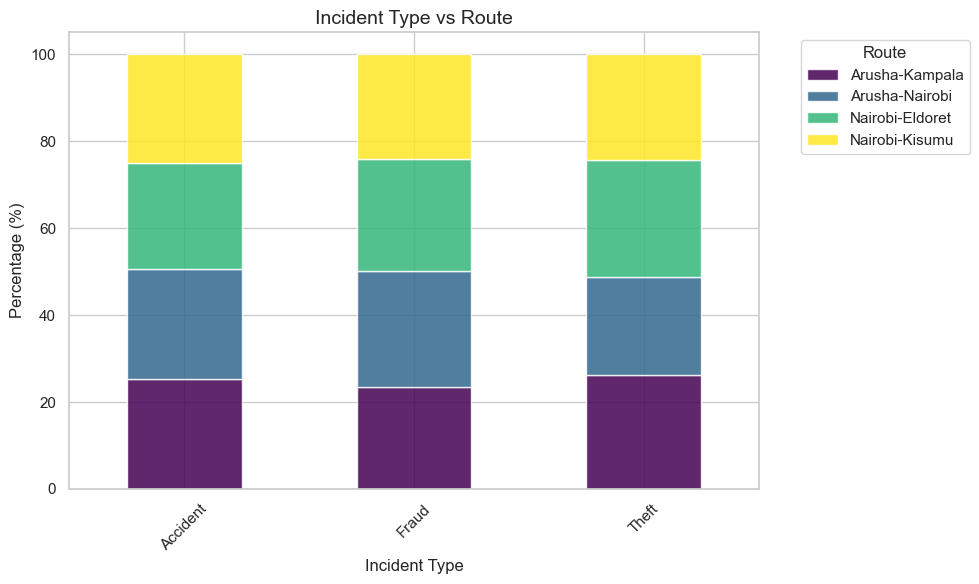


Cross-tabulation: Incident Type vs Cargo_Type
Cargo_Type       Alcohol   Clothing  Electronics  Machinery
Incident_Type                                              
Accident       23.652695  26.147705    24.800399  25.399202
Fraud          25.400641  24.118590    26.041667  24.439103
Theft          25.228833  26.201373    23.226545  25.343249


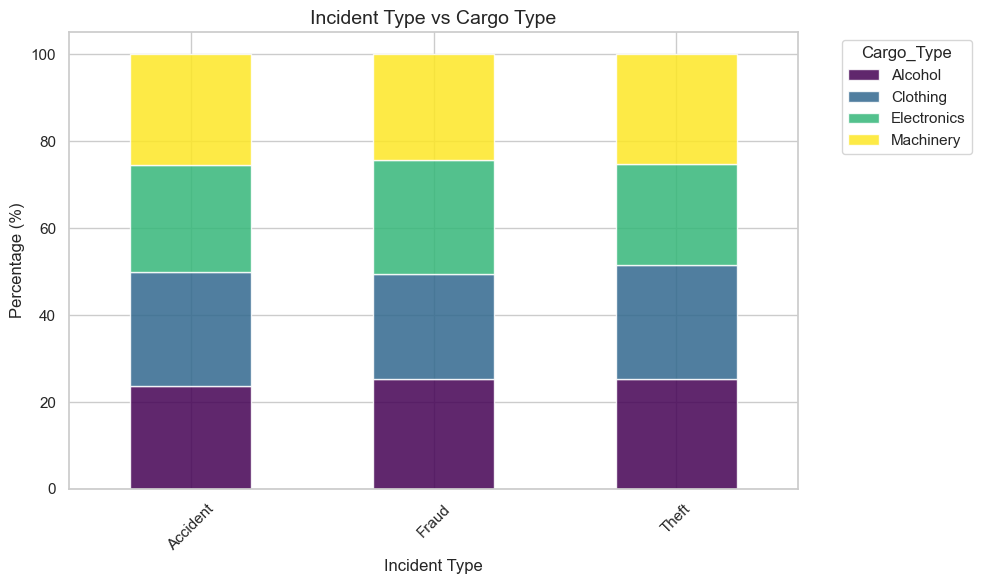


Cross-tabulation: Incident Type vs Client_Verification
Client_Verification          0          1
Incident_Type                            
Accident             31.487026  68.512974
Fraud                31.410256  68.589744
Theft                29.633867  70.366133


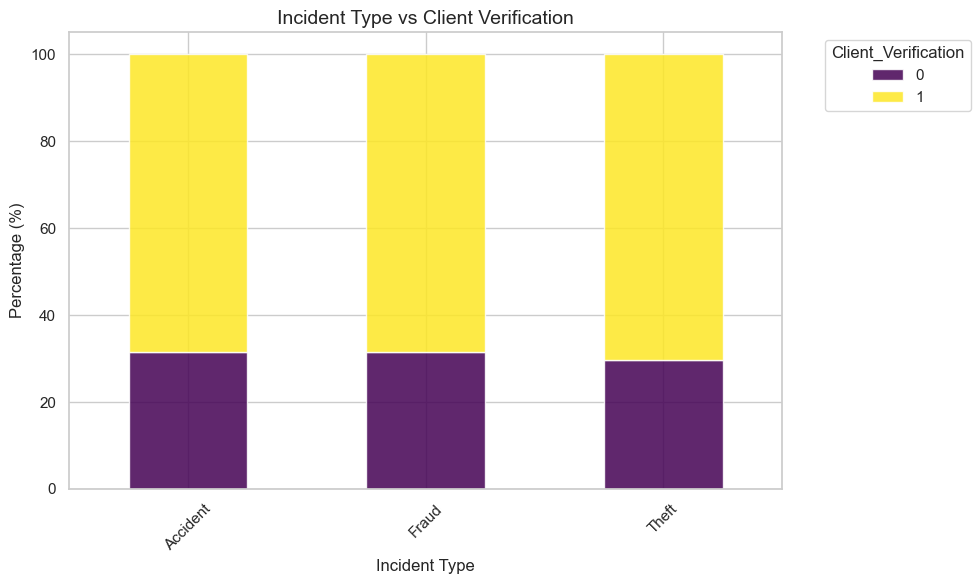

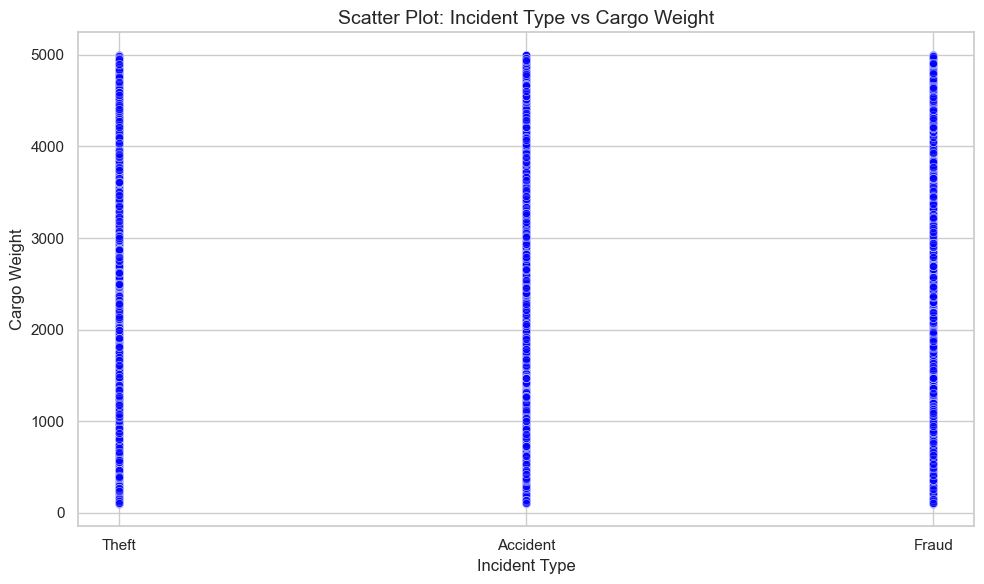


Cross-tabulation: Incident Type vs KRA_Lock
KRA_Lock               0          1
Incident_Type                      
Accident       49.850299  50.149701
Fraud          48.237179  51.762821
Theft          47.997712  52.002288


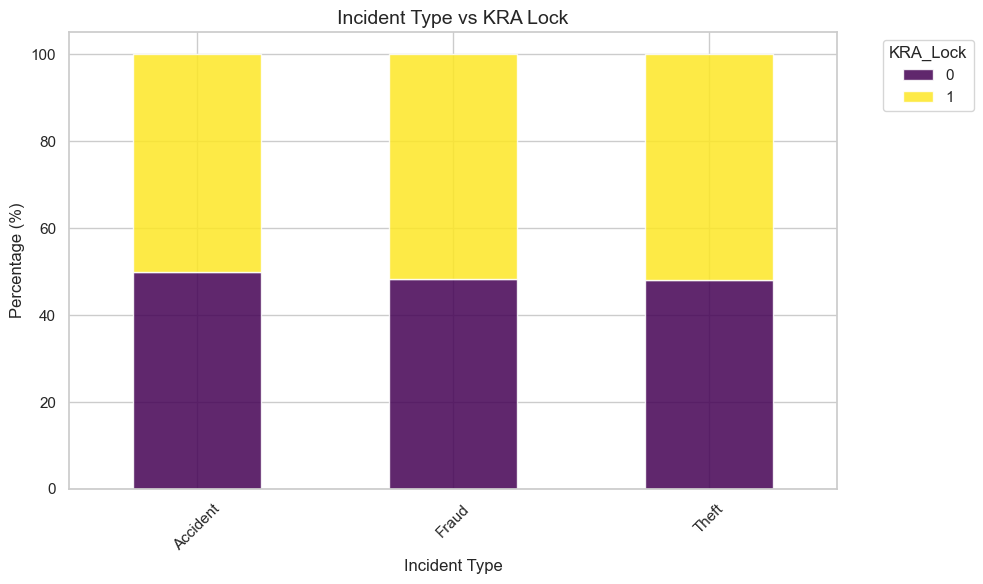

In [ ]:
# Function to calculate row percentages and visualize as a stacked bar chart for categorical variables
def plot_cross_tab_with_percentages(categorical_var, title):
    cross_tab = pd.crosstab(df_logistics['Incident_Type'], df_logistics[categorical_var], normalize='index') * 100  # Normalize by index (row percentages)

    # Display the cross-tabulation
    print(f"\nCross-tabulation: Incident Type vs {categorical_var}")
    print(cross_tab)

    # Visualize the cross-tabulation as a stacked bar chart
    cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis', alpha=0.85)
    plt.title(title, fontsize=14)
    plt.xlabel('Incident Type', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title=categorical_var, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Function to create scatter plot for numerical variables
def plot_scatter(x_variable, x_label, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_logistics, x='Incident_Type', y=x_variable, alpha=0.6, color='blue')
    plt.title(title, fontsize=14)
    plt.xlabel('Incident Type', fontsize=12)
    plt.ylabel(x_label, fontsize=12)
    plt.tight_layout()
    plt.show()

# 1. Incident Type vs Route (Categorical)
plot_cross_tab_with_percentages('Route', 'Incident Type vs Route')

# 2. Incident Type vs Cargo Type (Categorical)
plot_cross_tab_with_percentages('Cargo_Type', 'Incident Type vs Cargo Type')

# 3. Incident Type vs Client Verification (Categorical)
plot_cross_tab_with_percentages('Client_Verification', 'Incident Type vs Client Verification')

# 4. Incident Type vs Cargo Weight (Numerical)
plot_scatter('Cargo_Weight', 'Cargo Weight', 'Scatter Plot: Incident Type vs Cargo Weight')

# 5. Incident Type vs KRA Lock (Categorical)
plot_cross_tab_with_percentages('KRA_Lock', 'Incident Type vs KRA Lock')


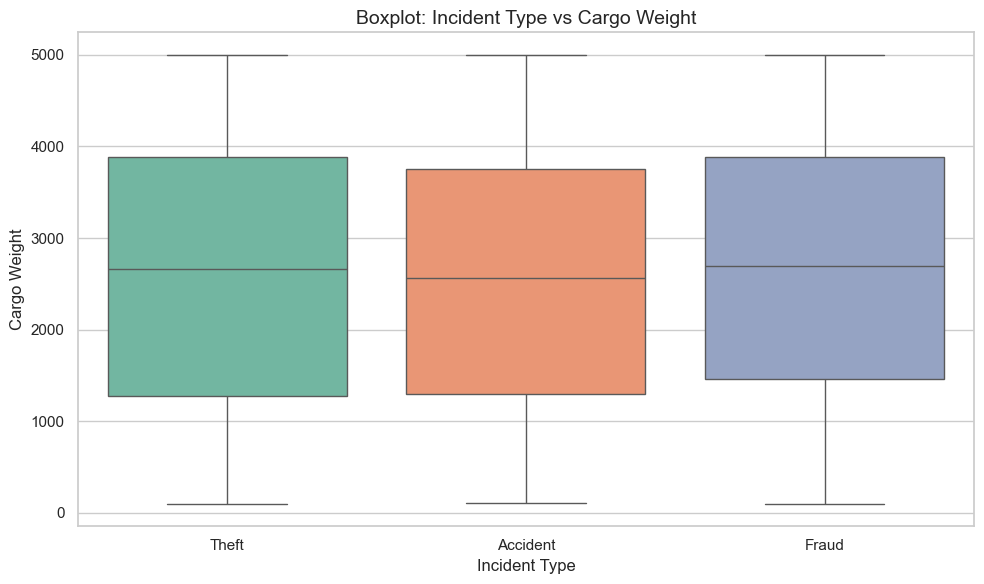

In [ ]:
# Boxplot for Cargo Weight vs Incident Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Incident_Type', y='Cargo_Weight', data=df_logistics, palette='Set2')
plt.title('Boxplot: Incident Type vs Cargo Weight', fontsize=14)
plt.xlabel('Incident Type', fontsize=12)
plt.ylabel('Cargo Weight', fontsize=12)
plt.tight_layout()
plt.show()

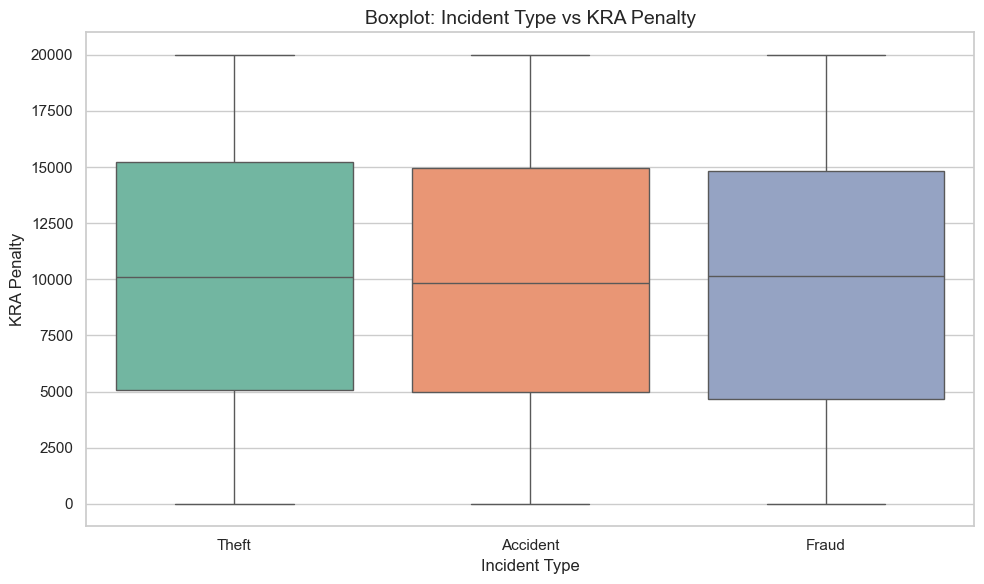

In [ ]:
# Boxplot for KRA Penalty vs Incident Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Incident_Type', y='KRA_Penalty', data=df_logistics, palette='Set2')
plt.title('Boxplot: Incident Type vs KRA Penalty', fontsize=14)
plt.xlabel('Incident Type', fontsize=12)
plt.ylabel('KRA Penalty', fontsize=12)
plt.tight_layout()
plt.show()


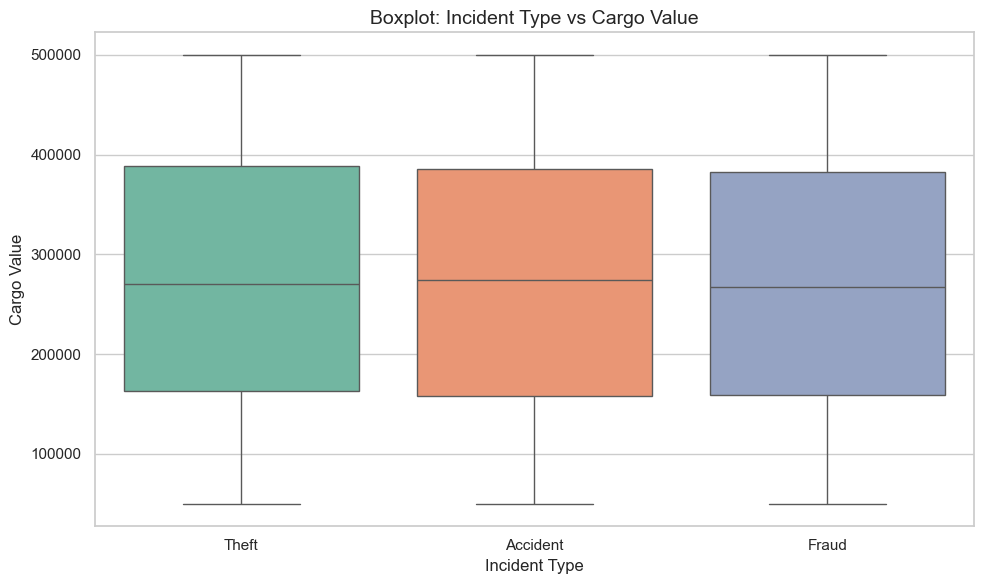

In [ ]:
# Boxplot for Cargo Value vs Incident Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Incident_Type', y='Cargo_Value', data=df_logistics, palette='Set2')
plt.title('Boxplot: Incident Type vs Cargo Value', fontsize=14)
plt.xlabel('Incident Type', fontsize=12)
plt.ylabel('Cargo Value', fontsize=12)
plt.tight_layout()
plt.show()


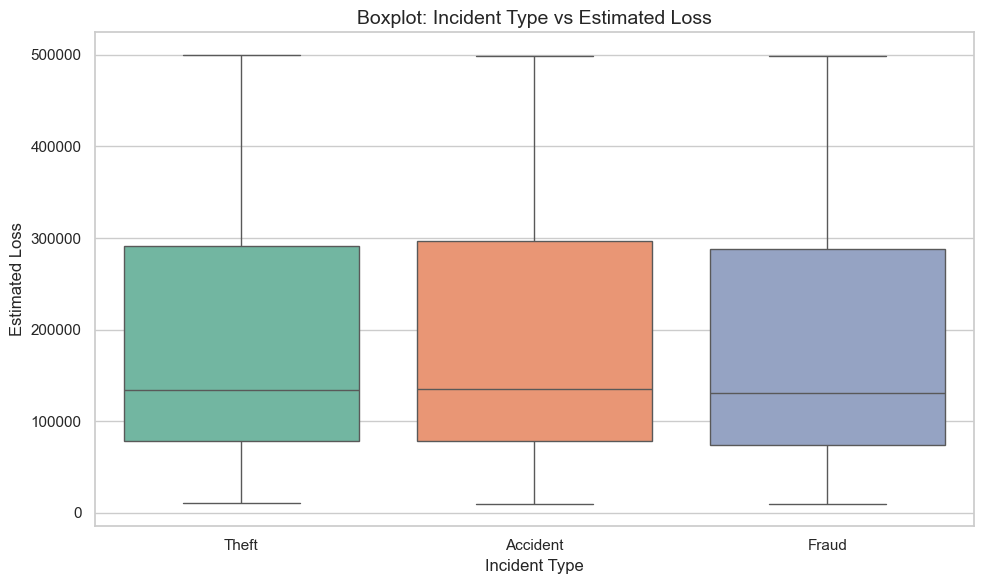

In [ ]:
# Boxplot for Estimated Loss vs Incident Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Incident_Type', y='Estimated_Loss', data=df_logistics, palette='Set2')
plt.title('Boxplot: Incident Type vs Estimated Loss', fontsize=14)
plt.xlabel('Incident Type', fontsize=12)
plt.ylabel('Estimated Loss', fontsize=12)
plt.tight_layout()
plt.show()


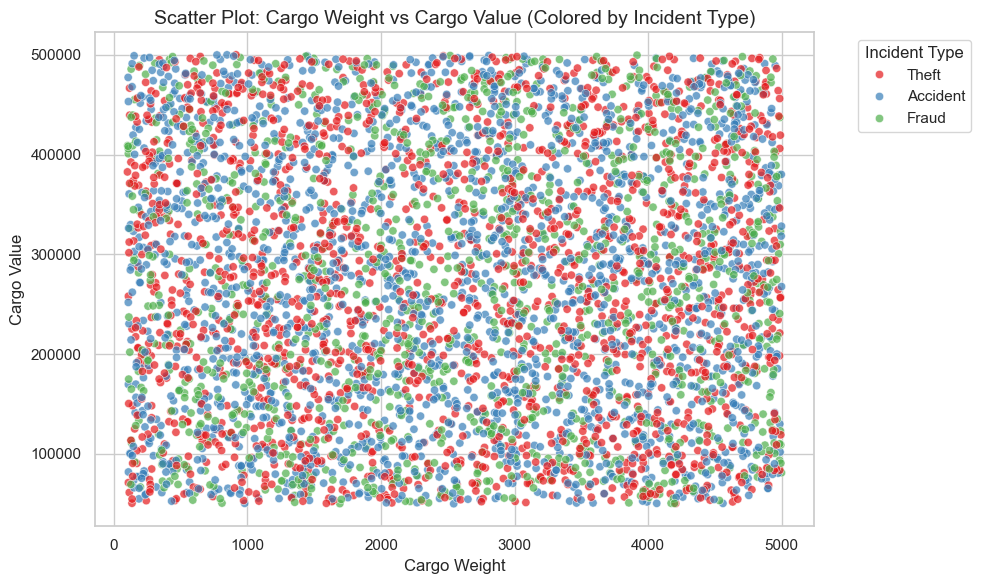

In [ ]:
# Scatter plot for Cargo Weight vs Cargo Value with Incident Type as hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cargo_Weight', y='Cargo_Value', hue='Incident_Type', data=df_logistics, palette='Set1', alpha=0.7)
plt.title('Scatter Plot: Cargo Weight vs Cargo Value (Colored by Incident Type)', fontsize=14)
plt.xlabel('Cargo Weight', fontsize=12)
plt.ylabel('Cargo Value', fontsize=12)
plt.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


CLASSIFICATION MODEL

In [ ]:
train_Data = df_logistics.copy()

In [ ]:
conditions = [
    (train_Data['Incident_Type'] == 'Theft'),
    (train_Data['Incident_Type'] == 'Accident'),
    (train_Data['Incident_Type'] == 'Fraud')
]
choices = [1, 2, 3]

train_Data['Incident_encoded'] = np.select(conditions, choices, default=0)


In [ ]:
train_Data.head()

,Client_ID,Client_Type,Client_Verification,Client_Location,Cargo_ID,Cargo_Type,Cargo_Value,Cargo_Weight,Transporter,Route,Border_Point,GPS_Location,KRA_Lock,KRA_Penalty,Incident_Type,Incident_Location,Incident_Report_Date,Cargo_Risk,Estimated_Loss,Incident_encoded
0,1,Business,1,Nairobi,1001,Electronics,351352.60,3988.19,Transporter C,Nairobi-Eldoret,Busia,"(-1.2454, 36.9028)",0,7259.68,Theft,Border,2022-03-12,High,168401.91,1
1,2,Individual,0,Kigali,1002,Electronics,483699.97,4518.18,Transporter B,Nairobi-Eldoret,Busia,"(-1.2759, 36.8267)",1,1246.74,Accident,Transit,2022-08-30,High,277605.26,2
2,3,Individual,1,Arusha,1003,Machinery,364093.90,2850.39,Transporter C,Nairobi-Eldoret,Namanga,"(-1.2195, 36.8727)",1,14215.07,Accident,Transit,2022-03-03,High,289737.93,2
3,4,Business,1,Nairobi,1004,Electronics,359324.24,2523.71,Transporter C,Arusha-Nairobi,Taveta,"(-1.25, 36.8932)",0,17358.07,Fraud,Border,2022-04-23,High,466074.91,3
4,5,Individual,1,Kampala,1005,Alcohol,402525.27,4311.16,Transporter A,Arusha-Kampala,Taveta,"(-1.1972, 36.8957)",0,4390.94,Theft,Transit,2022-09-02,High,418459.67,1


In [ ]:
# Create a copy of train_Data and store it in train_data
train_data = train_Data.copy()

# Drop the 'Incident_Type' column from train_data
train_data.drop(columns=['Incident_Type'], inplace=True)

# Display the first few rows of the modified train_data
train_data.head()


,Client_ID,Client_Type,Client_Verification,Client_Location,Cargo_ID,Cargo_Type,Cargo_Value,Cargo_Weight,Transporter,Route,Border_Point,GPS_Location,KRA_Lock,KRA_Penalty,Incident_Location,Incident_Report_Date,Cargo_Risk,Estimated_Loss,Incident_encoded
0,1,Business,1,Nairobi,1001,Electronics,351352.60,3988.19,Transporter C,Nairobi-Eldoret,Busia,"(-1.2454, 36.9028)",0,7259.68,Border,2022-03-12,High,168401.91,1
1,2,Individual,0,Kigali,1002,Electronics,483699.97,4518.18,Transporter B,Nairobi-Eldoret,Busia,"(-1.2759, 36.8267)",1,1246.74,Transit,2022-08-30,High,277605.26,2
2,3,Individual,1,Arusha,1003,Machinery,364093.90,2850.39,Transporter C,Nairobi-Eldoret,Namanga,"(-1.2195, 36.8727)",1,14215.07,Transit,2022-03-03,High,289737.93,2
3,4,Business,1,Nairobi,1004,Electronics,359324.24,2523.71,Transporter C,Arusha-Nairobi,Taveta,"(-1.25, 36.8932)",0,17358.07,Border,2022-04-23,High,466074.91,3
4,5,Individual,1,Kampala,1005,Alcohol,402525.27,4311.16,Transporter A,Arusha-Kampala,Taveta,"(-1.1972, 36.8957)",0,4390.94,Transit,2022-09-02,High,418459.67,1


In [ ]:
train_data.columns

Index(['Client_ID', 'Client_Type', 'Client_Verification', 'Client_Location',
       'Cargo_ID', 'Cargo_Type', 'Cargo_Value', 'Cargo_Weight', 'Transporter',
       'Route', 'Border_Point', 'GPS_Location', 'KRA_Lock', 'KRA_Penalty',
       'Incident_Location', 'Incident_Report_Date', 'Cargo_Risk',
       'Estimated_Loss', 'Incident_encoded'],
      dtype='object')

In [ ]:
# Drop unnecessary columns
train_data.drop(columns=['Cargo_ID', 'Client_ID',], inplace=True)

In [ ]:
# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to 'Cargo_Risk'
train_data['Cargo_Risk_encoded'] = label_encoder.fit_transform(train_Data['Cargo_Risk'])

# Drop the original 'Cargo_Risk' column if it's no longer needed
train_data.drop(columns=['Cargo_Risk'], inplace=True)

In [ ]:
# Perform one-hot encoding for the specified categorical columns
train_data = pd.get_dummies(train_data, columns=['Client_Type', 'Client_Location', 'Cargo_Type',
                                                 'Transporter', 'Route', 'Border_Point', 'Incident_Location'])



In [ ]:
# Convert 'Incident_Report_Date' to datetime type if it isn't already
train_data['Incident_Report_Date'] = pd.to_datetime(train_data['Incident_Report_Date'])

# Extract date-related features
train_data['Incident_Year'] = train_data['Incident_Report_Date'].dt.year
train_data['Incident_Month'] = train_data['Incident_Report_Date'].dt.month
train_data['Incident_Day'] = train_data['Incident_Report_Date'].dt.day
train_data['Incident_Weekday'] = train_data['Incident_Report_Date'].dt.weekday
train_data['Incident_Quarter'] = train_data['Incident_Report_Date'].dt.quarter

# Extract latitude and longitude from the GPS_Location column
train_data['latitude'] = train_data['GPS_Location'].apply(lambda x: x[0] if isinstance(x, tuple) else None)
train_data['longitude'] = train_data['GPS_Location'].apply(lambda x: x[1] if isinstance(x, tuple) else None)



In [ ]:
# Step 3: Create a copy of train_data to data
data = train_data.copy()

# Step 4: Drop the 'Incident_Report_Date' column from the new DataFrame 'data'
data.drop(columns=['Incident_Report_Date', 'GPS_Location'], inplace=True)

# Display the first few rows of the new DataFrame
data.head()

for column in data.columns:
    if data[column].apply(lambda x: isinstance(x, tuple)).any():
        print(f"Column '{column}' contains tuples. Consider converting them.")

In [ ]:
x_incident = data.loc[:, data.columns != 'Incident_encoded']
y_incident = data['Incident_encoded']
x_train_incident, x_test_incident, y_train_incident, y_test_incident = train_test_split(
    x_incident, y_incident, test_size=0.3, random_state=42
)


In [ ]:
scaler = StandardScaler()

# Separate numerical and categorical features
numerical_columns = x_incident.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = x_incident.select_dtypes(include=['object']).columns

# Apply scaling only to numerical features
x_train_incident[numerical_columns] = scaler.fit_transform(x_train_incident[numerical_columns])
x_test_incident[numerical_columns] = scaler.transform(x_test_incident[numerical_columns])


In [ ]:
def classifiermodel(model_incident, x_train_incident, x_test_incident, y_train_incident, y_test_incident):
    model_incident = model_incident.fit(x_train_incident, y_train_incident)
    y_pred_incident = model_incident.predict(x_test_incident)
    accuracy_incident = accuracy_score(y_pred_incident, y_test_incident)
    recall_incident = recall_score(y_pred_incident, y_test_incident, average='weighted')
    conf_incident = confusion_matrix(y_test_incident, y_pred_incident)
    f1_incident = f1_score(y_test_incident, y_pred_incident, average='weighted')
    print('Model paramters used are:', model_incident)
    print('Accuracy of incident type is:', accuracy_incident * 100, '%')
    print('Recall score of incident type is:', recall_incident * 100, '%')
    print('F1 score of incident type is:', f1_incident * 100, '%')
    print('Conf Matrix of incident type is:\n', conf_incident)


In [ ]:
# Initialize and train the models
model_incident_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0,  class_weight='balanced')
classifiermodel(model_incident_rf, x_train_incident, x_test_incident, y_train_incident, y_test_incident)

model_incident_svm = LinearSVC(class_weight='balanced')
classifiermodel(model_incident_svm, x_train_incident, x_test_incident, y_train_incident, y_test_incident)

model_incident_lr = LogisticRegression(solver='lbfgs', random_state=0, class_weight='balanced')
classifiermodel(model_incident_lr, x_train_incident, x_test_incident, y_train_incident, y_test_incident)


Model paramters used are: RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=0)
Accuracy of incident type is: 35.13333333333333 %
Recall score of incident type is: 35.13333333333333 %
F1 score of incident type is: 34.05265556282441 %
Conf Matrix of incident type is:
 [[185 255  94]
 [219 282  86]
 [138 181  60]]
Model paramters used are: LinearSVC(class_weight='balanced')
Accuracy of incident type is: 36.266666666666666 %
Recall score of incident type is: 36.266666666666666 %
F1 score of incident type is: 33.742643959741585 %
Conf Matrix of incident type is:
 [[197 282  55]
 [224 314  49]
 [147 199  33]]
Model paramters used are: LogisticRegression(class_weight='balanced', random_state=0)
Accuracy of incident type is: 31.733333333333334 %
Recall score of incident type is: 31.733333333333334 %
F1 score of incident type is: 31.45249221151444 %
Conf Matrix of incident type is:
 [[198 100 236]
 [240 127 220]
 [154  74 151]]


In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_incident, y_train_incident)

# Check the new class distribution
print("Class distribution after SMOTE:", Counter(y_train_smote))


  File "C:\Users\rovyt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.2032.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Class distribution after SMOTE: Counter({1: 1417, 2: 1417, 3: 1417})


In [ ]:
# FOR LDA
model_incident_lda = LinearDiscriminantAnalysis()
model_incident_lda.fit(x_train_smote, y_train_smote)
y_pred_lda = model_incident_lda.predict(x_test_incident)

# Evaluate the LDA model
accuracy_lda = accuracy_score(y_test_incident, y_pred_lda)
recall_lda = recall_score(y_test_incident, y_pred_lda, average='weighted')
f1_lda = f1_score(y_test_incident, y_pred_lda, average='weighted')
conf_matrix_lda = confusion_matrix(y_test_incident, y_pred_lda)

print("LDA - Accuracy:", accuracy_lda)
print("LDA - Recall:", recall_lda)
print("LDA - F1 Score:", f1_lda)
print("LDA - Confusion Matrix:\n", conf_matrix_lda)


LDA - Accuracy: 0.36533333333333334
LDA - Recall: 0.36533333333333334
LDA - F1 Score: 0.30558075601374574
LDA - Confusion Matrix:
 [[180 353   1]
 [219 368   0]
 [135 244   0]]


In [ ]:
# FOR GaussianNB
model_incident_nb = GaussianNB()
model_incident_nb.fit(x_train_smote, y_train_smote)
y_pred_nb = model_incident_nb.predict(x_test_incident)

# Evaluate the GaussianNB model
accuracy_nb = accuracy_score(y_test_incident, y_pred_nb)
recall_nb = recall_score(y_test_incident, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test_incident, y_pred_nb, average='weighted')
conf_matrix_nb = confusion_matrix(y_test_incident, y_pred_nb)

print("GaussianNB - Accuracy:", accuracy_nb)
print("GaussianNB - Recall:", recall_nb)
print("GaussianNB - F1 Score:", f1_nb)
print("GaussianNB - Confusion Matrix:\n", conf_matrix_nb)


GaussianNB - Accuracy: 0.376
GaussianNB - Recall: 0.376
GaussianNB - F1 Score: 0.23863344267066042
GaussianNB - Confusion Matrix:
 [[ 14 501  19]
 [ 22 543  22]
 [  9 363   7]]


In [ ]:
# Check initial class distribution
print("Original Class Distribution:", Counter(y_train_incident))

Original Class Distribution: Counter({2: 1417, 1: 1214, 3: 869})


In [ ]:
smote = SMOTE(sampling_strategy={3: 1417}, random_state=42)  # Target Fraud to match the largest class
X_resampled, y_resampled = smote.fit_resample(x_train_incident, y_train_incident)
print(f"Class Distribution After Oversampling: {Counter(y_resampled)}")

Class Distribution After Oversampling: Counter({2: 1417, 3: 1417, 1: 1214})


In [ ]:
# RandomForest Classifier with class_weight
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42)
classifiermodel(model_rf, X_resampled, x_test_incident, y_resampled, y_test_incident)

# LinearSVC with class_weight
model_svm = LinearSVC(class_weight='balanced', random_state=42)
classifiermodel(model_svm, X_resampled, x_test_incident, y_resampled, y_test_incident)

# Logistic Regression with class_weight
model_lr = LogisticRegression(class_weight='balanced', random_state=42)
classifiermodel(model_lr, X_resampled, x_test_incident, y_resampled, y_test_incident)

# Linear Discriminant Analysis (No class_weight, rely on oversampling)
model_lda = LinearDiscriminantAnalysis()
classifiermodel(model_lda, X_resampled, x_test_incident, y_resampled, y_test_incident)

# Gaussian Naive Bayes (No class_weight, rely on oversampling)
model_nb = GaussianNB()
classifiermodel(model_nb, X_resampled, x_test_incident, y_resampled, y_test_incident)


Model paramters used are: RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)
Accuracy of incident type is: 36.6 %
Recall score of incident type is: 36.6 %
F1 score of incident type is: 33.75416682097899 %
Conf Matrix of incident type is:
 [[212 267  55]
 [235 311  41]
 [143 210  26]]
Model paramters used are: LinearSVC(class_weight='balanced', random_state=42)
Accuracy of incident type is: 37.46666666666666 %
Recall score of incident type is: 37.46666666666666 %
F1 score of incident type is: 31.618612682047942 %
Conf Matrix of incident type is:
 [[203 331   0]
 [228 359   0]
 [148 231   0]]
Model paramters used are: LogisticRegression(class_weight='balanced', random_state=42)
Accuracy of incident type is: 34.53333333333333 %
Recall score of incident type is: 34.53333333333333 %
F1 score of incident type is: 34.48785967861564 %
Conf Matrix of incident type is:
 [[211 186 137]
 [238 215 134]
 [153 134  92]]
Model paramters used are: LinearDiscriminantAnalysis(

In [ ]:
# Ensure X_resampled and y_resampled are numpy arrays
X_resampled = X_resampled.values if isinstance(X_resampled, pd.DataFrame) else X_resampled
y_resampled = y_resampled.values if isinstance(y_resampled, pd.Series) else y_resampled

# Define StratifiedKFold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize models
models = {
    "RandomForest": RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42),
    "LinearSVC": LinearSVC(class_weight='balanced', random_state=42),
    "LogisticRegression": LogisticRegression(class_weight='balanced', random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "GaussianNB": GaussianNB()
}

# Cross-validation loop
for model_name, model in models.items():
    print(f"Evaluating model: {model_name}")

    # Store results
    accuracy_scores = []
    recall_scores = []
    f1_scores = []

    for train_index, test_index in skf.split(X_resampled, y_resampled):
        X_train, X_test = X_resampled[train_index], X_resampled[test_index]
        y_train, y_test = y_resampled[train_index], y_resampled[test_index]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Collecting evaluation metrics
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

    # Print average metrics for this model
    print(f"Average Accuracy: {np.mean(accuracy_scores):.4f}")
    print(f"Average Recall: {np.mean(recall_scores):.4f}")
    print(f"Average F1 Score: {np.mean(f1_scores):.4f}")
    print("="*50)


Evaluating model: RandomForest
Average Accuracy: 0.4696
Average Recall: 0.4696
Average F1 Score: 0.4776
Evaluating model: LinearSVC
Average Accuracy: 0.4597
Average Recall: 0.4597
Average F1 Score: 0.4703
Evaluating model: LogisticRegression
Average Accuracy: 0.4331
Average Recall: 0.4331
Average F1 Score: 0.4346
Evaluating model: LDA
Average Accuracy: 0.4699
Average Recall: 0.4699
Average F1 Score: 0.4638
Evaluating model: GaussianNB
Average Accuracy: 0.4442
Average Recall: 0.4442
Average F1 Score: 0.3708


In [ ]:
rf_model = RandomForestClassifier(random_state=42)

param_dist_rf = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

# Perform RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf,
                                      n_iter=10, cv=5, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)

# Fit the model
random_search_rf.fit(X_resampled, y_resampled)

# Print the best parameters and score
print(f"Best Parameters for Random Forest: {random_search_rf.best_params_}")
print(f"Best Accuracy for Random Forest: {random_search_rf.best_score_}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'class_weight': None}
Best Accuracy for Random Forest: 0.4768478078408033


In [ ]:
lda_model = LinearDiscriminantAnalysis()

param_grid_lda = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': ['auto', 0.1, 0.5, 1.0],
    'priors': [None, [1/3, 1/3, 1/3]],  # Using uniform priors for 3 classes
    'n_components': [None, 2, 3]
}

# Perform GridSearchCV
grid_search_lda = GridSearchCV(estimator=lda_model, param_grid=param_grid_lda, cv=5,
                               scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the model
grid_search_lda.fit(X_resampled, y_resampled)

# Print the best parameters and score
print(f"Best Parameters for LDA: {grid_search_lda.best_params_}")
print(f"Best Accuracy for LDA: {grid_search_lda.best_score_}")



Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters for LDA: {'n_components': None, 'priors': None, 'shrinkage': 'auto', 'solver': 'lsqr'}
Best Accuracy for LDA: 0.47440583558424515


In [ ]:
# Evaluate Random Forest
# Access the best model (i.e., the one with the best hyperparameters)
best_rf_model = random_search_rf.best_estimator_

# Use it to make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test)


print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred_rf)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred_rf)}")

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       242
           2       1.00      1.00      1.00       284
           3       1.00      1.00      1.00       283

    accuracy                           1.00       809
   macro avg       1.00      1.00      1.00       809
weighted avg       1.00      1.00      1.00       809

Confusion Matrix:
 [[242   0   0]
 [  0 284   0]
 [  0   0 283]]


In [ ]:
# Evaluate LDA
y_pred_lda = grid_search_lda.best_estimator_.predict(X_test)
print("LDA - Accuracy:", accuracy_score(y_test, y_pred_lda))
print("LDA - Recall:", recall_score(y_test, y_pred_lda, average='weighted'))
print("LDA - F1 Score:", f1_score(y_test, y_pred_lda, average='weighted'))
print("LDA - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))

LDA - Accuracy: 0.5129789864029666
LDA - Recall: 0.5129789864029666
LDA - F1 Score: 0.5016349759269207
LDA - Confusion Matrix:
 [[ 74 168   0]
 [ 51 233   0]
 [ 36 139 108]]


In [ ]:
# Step 1: Split your data into training and holdout datasets
X_train, X_holdout, y_train, y_holdout = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 2: Initialize the RandomForest model
rf_model = RandomForestClassifier(n_estimators=200, min_samples_split=2,
                                  min_samples_leaf=2, max_depth=None,
                                  class_weight=None, random_state=42)

# Step 3: Train the model on the training data
rf_model.fit(X_train, y_train)

# Step 4: Make predictions on the holdout dataset
y_pred = rf_model.predict(X_holdout)

# Step 5: Evaluate the model on the holdout dataset
accuracy = accuracy_score(y_holdout, y_pred)
print(f"Accuracy on holdout dataset: {accuracy * 100:.2f}%")

# Step 6: Print the classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_holdout, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_holdout, y_pred))


Accuracy on holdout dataset: 48.27%

Classification Report:
              precision    recall  f1-score   support

           1       0.37      0.28      0.32       241
           2       0.41      0.60      0.49       284
           3       0.71      0.54      0.61       285

    accuracy                           0.48       810
   macro avg       0.50      0.47      0.47       810
weighted avg       0.51      0.48      0.48       810


Confusion Matrix:
[[ 68 149  24]
 [ 75 170  39]
 [ 39  93 153]]


In [ ]:
# Apply SMOTE to balance all classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print(f"Class Distribution After Oversampling: {Counter(y_resampled)}")

Class Distribution After Oversampling: Counter({np.int64(3): 1133, np.int64(1): 1133, np.int64(2): 1133})


In [ ]:
# Train the Random Forest model with the resampled data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_resampled, y_resampled)

# Predict on the test set (or holdout set)
y_pred = rf_model.predict(X_test)

# Evaluate the performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Print accuracy
print(f"Accuracy on Test Set: {accuracy_score(y_test, y_pred)}")

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy on Test Set: 0.896168108776267
Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.88      0.88       242
           2       0.85      0.91      0.88       284
           3       0.96      0.90      0.93       283

    accuracy                           0.90       809
   macro avg       0.90      0.90      0.90       809
weighted avg       0.90      0.90      0.90       809

Confusion Matrix:
 [[212  28   2]
 [ 18 258   8]
 [ 12  16 255]]


PREDICTING ESTIMATED LOSS

In [ ]:
# Assuming `data` is your dataframe and 'Estimated_Loss' is the target variable
x_loss = data.loc[:, data.columns != 'Estimated_Loss']
y_loss = data['Estimated_Loss']

# Split data into train and test sets
x_train_loss, x_test_loss, y_train_loss, y_test_loss = train_test_split(
    x_loss, y_loss, test_size=0.3, random_state=42
)

# Scaling the features
scaler = StandardScaler()

# Separate numerical and categorical features
numerical_columns = x_train_loss.select_dtypes(include=['float64', 'int64']).columns
x_train_loss[numerical_columns] = scaler.fit_transform(x_train_loss[numerical_columns])
x_test_loss[numerical_columns] = scaler.transform(x_test_loss[numerical_columns])

In [ ]:
x_train_loss, x_test_loss, y_train_loss, y_test_loss = train_test_split(x_loss, y_loss, test_size = 0.2, random_state=42)

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
rf_regressor.fit(x_train_loss,y_train_loss)

RandomForestRegressor()

In [ ]:
# prediction on Test Data
y_pred = rf_regressor.predict(x_test_loss)

In [ ]:
# R squared error
error_score = r2_score(y_test_loss, y_pred) # Assuming y_pred_loss should be y_pred
print("R squared error : ", error_score)

R squared error :  0.7403982186145148


In [ ]:
y_test_list = list(y_test_loss)

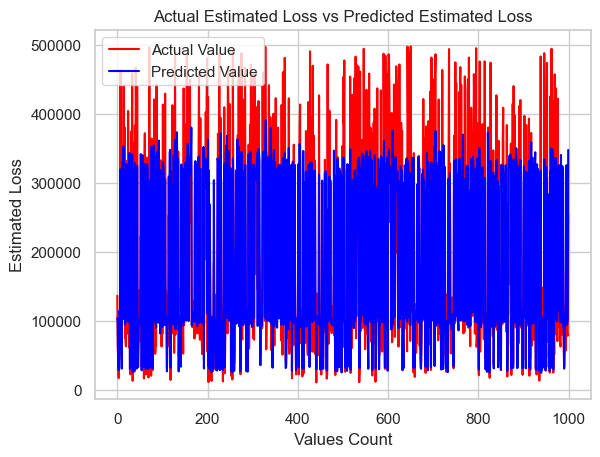

In [ ]:
plt.plot(y_test_list, color='red', label = 'Actual Value')
plt.plot(y_pred, color='blue', label='Predicted Value')
plt.title('Actual Estimated Loss vs Predicted Estimated Loss')
plt.xlabel('Values Count')
plt.ylabel('Estimated Loss')
plt.legend()
plt.show()

In [ ]:
# Compute weights for each sample based on some criteria
# For demonstration purposes, we use random weights. You can modify this as needed.
weights = np.ones_like(y_train_loss)  # Initialize equal weights for all samples

# Optionally, adjust the weights for samples that might be underrepresented
# Example: Increase the weight for specific target ranges
weights = np.where(y_train_loss < np.percentile(y_train_loss, 25), 2, weights)  # Example: increase weight for the lower 25% values

# Train the Random Forest Regressor with sample weights
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train_loss, y_train_loss, sample_weight=weights)

# Evaluate the model
y_pred_loss = rf_regressor.predict(x_test_loss)
mse = mean_squared_error(y_test_loss, y_pred_loss)
mae = mean_absolute_error(y_test_loss, y_pred_loss)
r2 = r2_score(y_test_loss, y_pred_loss)

# Display evaluation metrics
print(f"Random Forest Regressor with Sample Weights - MSE: {mse}, MAE: {mae}, R²: {r2}")


Random Forest Regressor with Sample Weights - MSE: 5126303912.529396, MAE: 52064.319776599994, R²: 0.7447773453354019


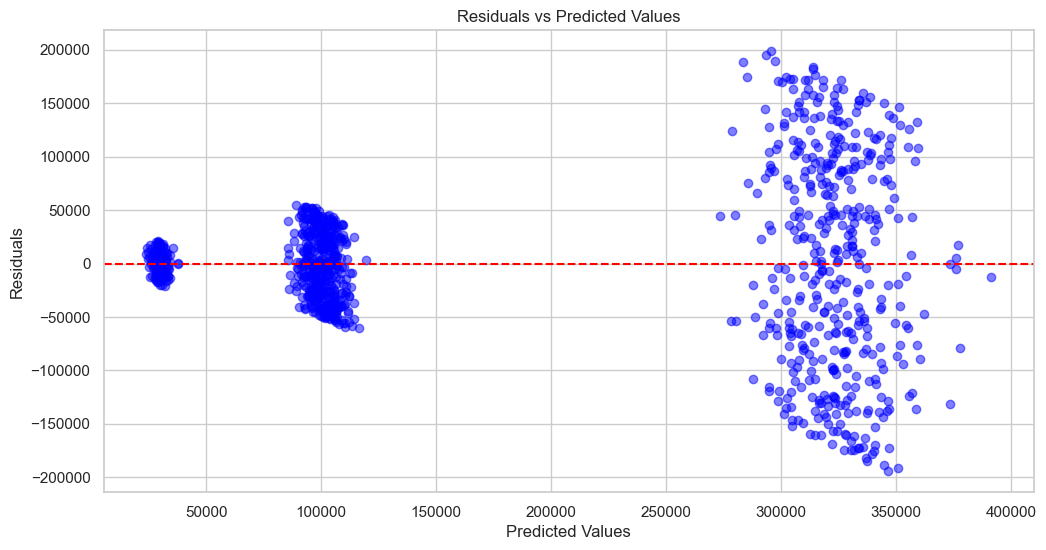

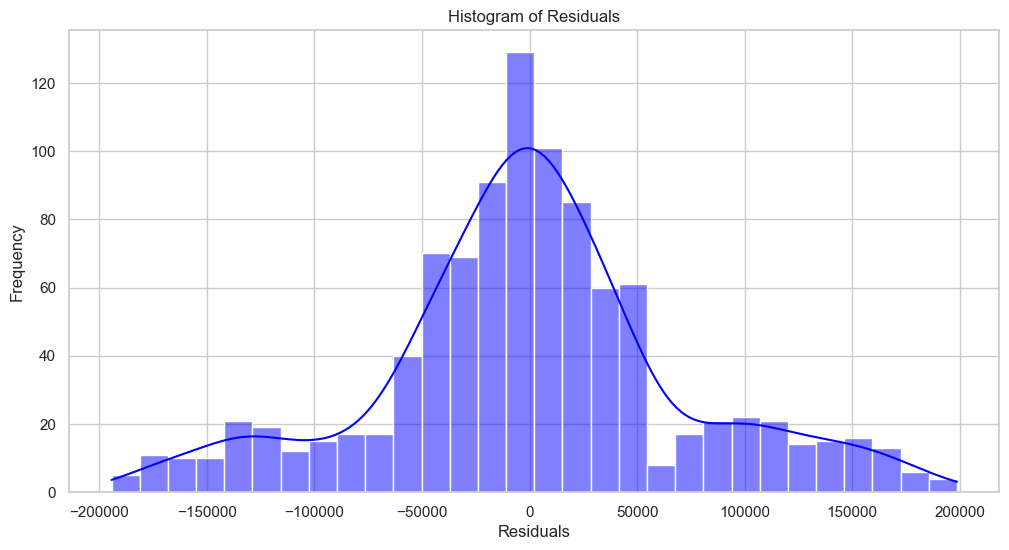

Number of outliers (residuals > 3 std): 0


In [ ]:
# Predict the target values using the trained model
y_pred_loss = rf_regressor.predict(x_test_loss)

# Calculate residuals
residuals = y_test_loss - y_pred_loss

# 1. Residual vs Predicted Values Plot
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_loss, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# 2. Histogram of Residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 3. Check for Outliers in Residuals
outliers = residuals[np.abs(residuals) > 3 * np.std(residuals)]
print(f"Number of outliers (residuals > 3 std): {len(outliers)}")


Skewness of Estimated_Loss: 0.7421754361547219


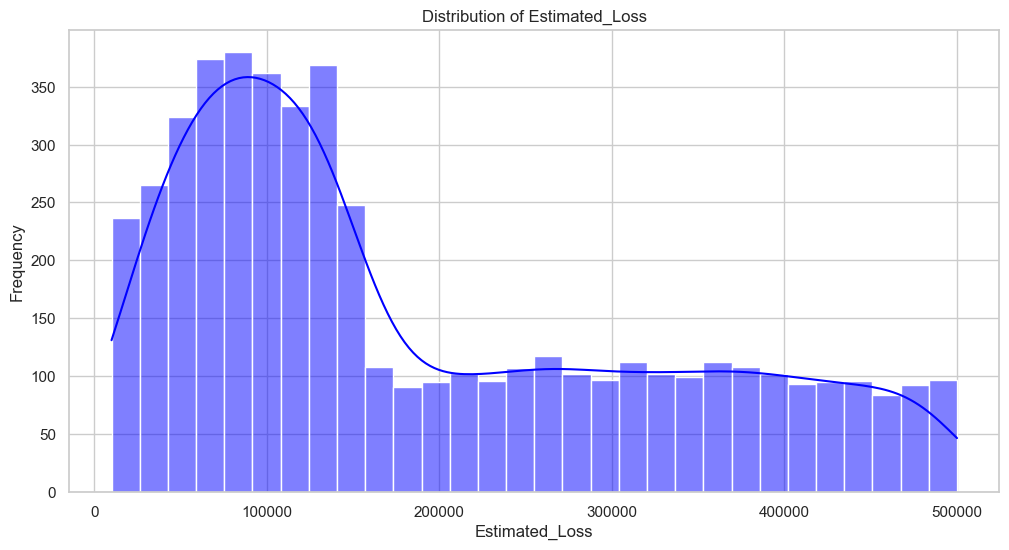

In [ ]:
# Check the skewness of the Estimated_Loss distribution
skewness = data["Estimated_Loss"].skew()
print(f"Skewness of Estimated_Loss: {skewness}")

# Visualize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(data["Estimated_Loss"], kde=True, color='blue', bins=30)
plt.title('Distribution of Estimated_Loss')
plt.xlabel('Estimated_Loss')
plt.ylabel('Frequency')
plt.show()


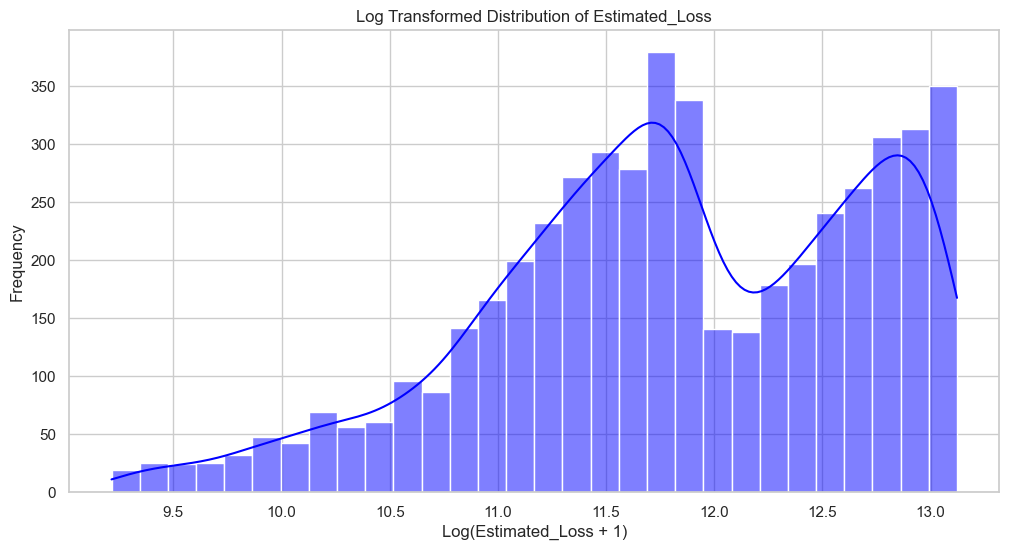

Skewness of Transformed Estimated_Loss: -0.4757666731679051


In [ ]:
# Log transform of Estimated_Loss (if values are positive)
data["Estimated_Loss_Transformed"] = np.log1p(data["Estimated_Loss"])  # log1p handles 0 by applying log(1 + x)

# Visualize the transformed data
plt.figure(figsize=(12, 6))
sns.histplot(data["Estimated_Loss_Transformed"], kde=True, color='blue', bins=30)
plt.title('Log Transformed Distribution of Estimated_Loss')
plt.xlabel('Log(Estimated_Loss + 1)')
plt.ylabel('Frequency')
plt.show()

# Check skewness again after transformation
print(f"Skewness of Transformed Estimated_Loss: {data['Estimated_Loss_Transformed'].skew()}")


In [ ]:
# Split the data into training and testing sets (using transformed target variable)
x_train_loss, x_test_loss, y_train_loss_transformed, y_test_loss_transformed = train_test_split(
    x_loss, data["Estimated_Loss_Transformed"], test_size=0.3, random_state=42
)

In [ ]:
# Train the model (Random Forest Regressor)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x_train_loss, y_train_loss_transformed)

# Predict on the test set
y_pred_loss_transformed = rf_regressor.predict(x_test_loss)

# Evaluate the model
mse_transformed = mean_squared_error(y_test_loss_transformed, y_pred_loss_transformed)
mae_transformed = mean_absolute_error(y_test_loss_transformed, y_pred_loss_transformed)
r2_transformed = r2_score(y_test_loss_transformed, y_pred_loss_transformed)

print(f"Transformed Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse_transformed}")
print(f"Mean Absolute Error (MAE): {mae_transformed}")
print(f"R²: {r2_transformed}")


Transformed Model Evaluation:
Mean Squared Error (MSE): 0.11711494071453048
Mean Absolute Error (MAE): 0.289639233057321
R²: 0.8502415669087091


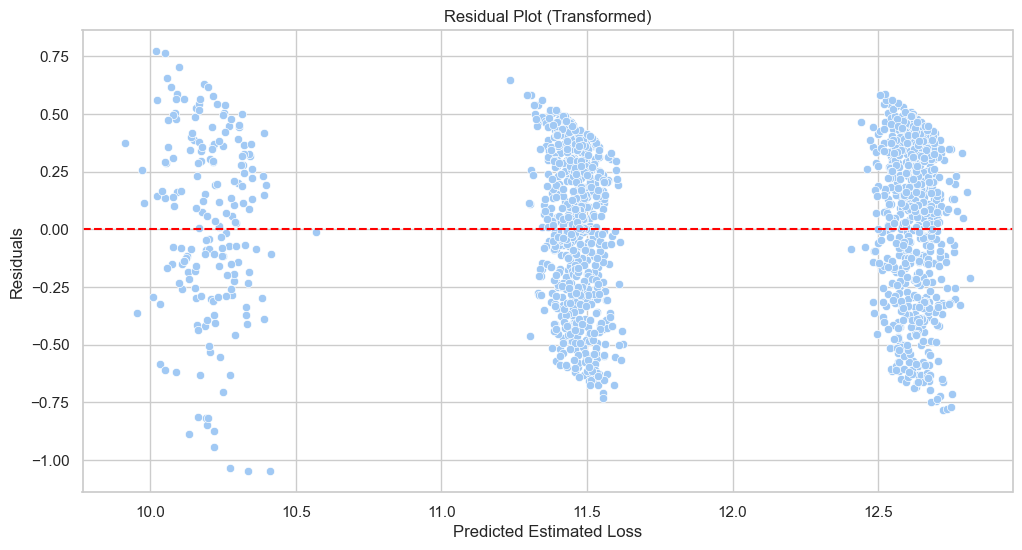

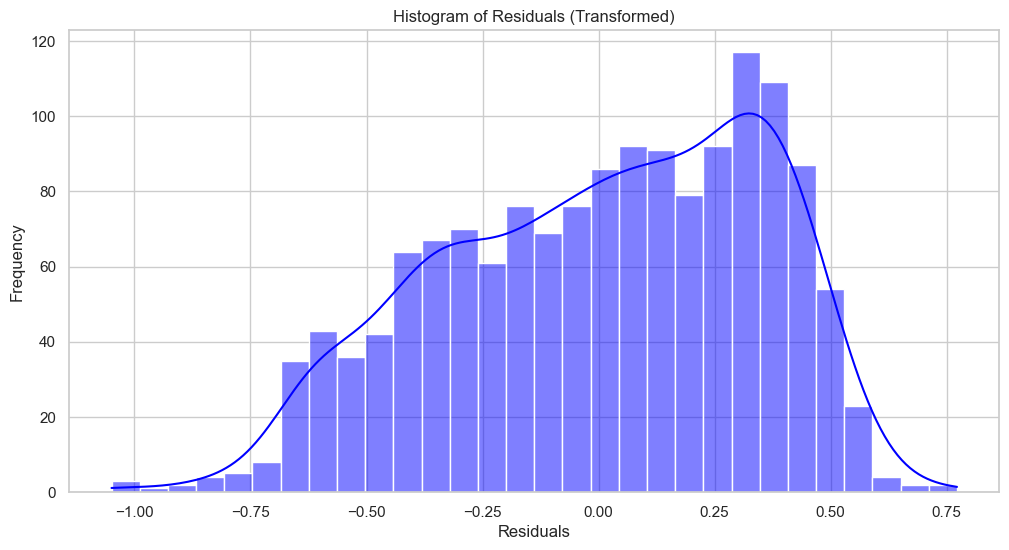

In [ ]:
# Residual analysis
residuals_transformed = y_test_loss_transformed - y_pred_loss_transformed

# Plot residuals
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_pred_loss_transformed, y=residuals_transformed)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot (Transformed)")
plt.xlabel("Predicted Estimated Loss")
plt.ylabel("Residuals")
plt.show()

# Histogram of residuals
plt.figure(figsize=(12, 6))
sns.histplot(residuals_transformed, kde=True, color='blue', bins=30)
plt.title("Histogram of Residuals (Transformed)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True]
}

# Initialize the RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)

# Setup the RandomizedSearchCV with cross-validation (cv=5 for example)
random_search = RandomizedSearchCV(
    estimator=rf_regressor,
    param_distributions=param_grid,
    n_iter=20,  # Number of random parameter combinations to test
    cv=3,  # 3-fold cross-validation
    verbose=2,  # Show progress
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Perform the random search on the training data (using transformed target variable)
random_search.fit(x_train_loss, y_train_loss_transformed)

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters:", random_search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


In [ ]:
# Get the best model
best_rf_model = random_search.best_estimator_

# Predict using the best model on the test data
y_pred_loss_transformed = best_rf_model.predict(x_test_loss)

# Evaluate the model
mse = mean_squared_error(y_test_loss_transformed, y_pred_loss_transformed)
mae = mean_absolute_error(y_test_loss_transformed, y_pred_loss_transformed)
r2 = r2_score(y_test_loss_transformed, y_pred_loss_transformed)

# Display evaluation metrics
print(f"Hyperparameter Tuned Model - MSE: {mse}, MAE: {mae}, R²: {r2}")

Hyperparameter Tuned Model - MSE: 0.12044963145612463, MAE: 0.2925584626279863, R²: 0.8459773965367796


Base Model - MSE: 0.11711494071453048, MAE: 0.289639233057321, R²: 0.8502415669087091
Tuned Model - MSE: 0.11978785112155958, MAE: 0.29222429493229335, R²: 0.8468236351580045


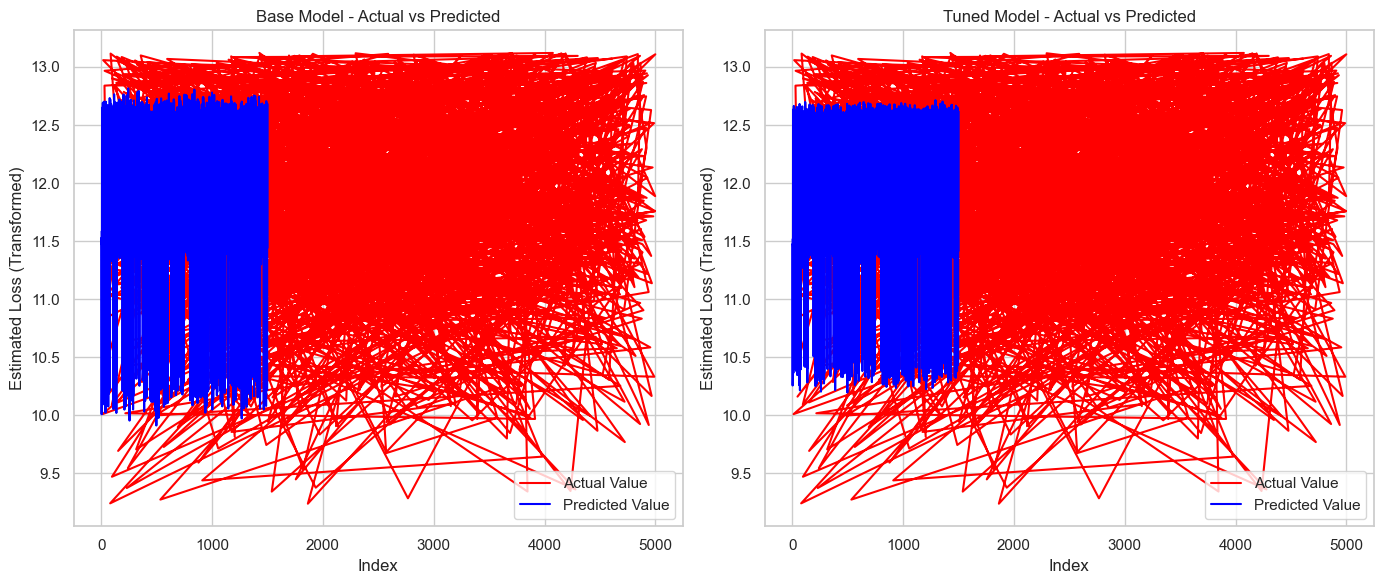

In [ ]:
# 1. Base Model (Without Hyperparameter Tuning)
rf_base = RandomForestRegressor(n_estimators=100, random_state=42)
rf_base.fit(x_train_loss, y_train_loss_transformed)

# Predict on the test set
y_pred_base = rf_base.predict(x_test_loss)

# Evaluate the base model
mse_base = mean_squared_error(y_test_loss_transformed, y_pred_base)
mae_base = mean_absolute_error(y_test_loss_transformed, y_pred_base)
r2_base = r2_score(y_test_loss_transformed, y_pred_base)

print(f"Base Model - MSE: {mse_base}, MAE: {mae_base}, R²: {r2_base}")

# 2. Tuned Model (With Hyperparameter Tuning)
rf_tuned = RandomForestRegressor(
    n_estimators=200, min_samples_split=5, min_samples_leaf=1,
    max_features='sqrt', max_depth=20, bootstrap=True, random_state=42
)
rf_tuned.fit(x_train_loss, y_train_loss_transformed)

# Predict on the test set
y_pred_tuned = rf_tuned.predict(x_test_loss)

# Evaluate the tuned model
mse_tuned = mean_squared_error(y_test_loss_transformed, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test_loss_transformed, y_pred_tuned)
r2_tuned = r2_score(y_test_loss_transformed, y_pred_tuned)

print(f"Tuned Model - MSE: {mse_tuned}, MAE: {mae_tuned}, R²: {r2_tuned}")

# 3. Plotting Actual vs Predicted for Both Models

# Base Model Actual vs Predicted
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(y_test_loss_transformed, color='red', label='Actual Value')
plt.plot(y_pred_base, color='blue', label='Predicted Value')
plt.title('Base Model - Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Estimated Loss (Transformed)')
plt.legend()

# Tuned Model Actual vs Predicted
plt.subplot(1, 2, 2)
plt.plot(y_test_loss_transformed, color='red', label='Actual Value')
plt.plot(y_pred_tuned, color='blue', label='Predicted Value')
plt.title('Tuned Model - Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Estimated Loss (Transformed)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Cross-validation for the Base Model
base_rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
base_cv_scores = cross_val_score(base_rf_regressor, x_train_loss, y_train_loss_transformed, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive values
base_cv_mse = -base_cv_scores
base_cv_mae = np.sqrt(base_cv_mse)  # Mean Absolute Error equivalent (RMSE)
base_cv_r2 = cross_val_score(base_rf_regressor, x_train_loss, y_train_loss_transformed, cv=5, scoring='r2')

print(f"Base Model Cross-Validation - MSE: {base_cv_mse.mean()}, MAE: {base_cv_mae.mean()}, R²: {base_cv_r2.mean()}")

# Cross-validation for the Tuned Model
tuned_rf_regressor = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=20,
    bootstrap=True,
    random_state=42
)

# Perform cross-validation for tuned model
tuned_cv_scores = cross_val_score(tuned_rf_regressor, x_train_loss, y_train_loss_transformed, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive values
tuned_cv_mse = -tuned_cv_scores
tuned_cv_mae = np.sqrt(tuned_cv_mse)  # Mean Absolute Error equivalent (RMSE)
tuned_cv_r2 = cross_val_score(tuned_rf_regressor, x_train_loss, y_train_loss_transformed, cv=5, scoring='r2')

print(f"Tuned Model Cross-Validation - MSE: {tuned_cv_mse.mean()}, MAE: {tuned_cv_mae.mean()}, R²: {tuned_cv_r2.mean()}")


Base Model Cross-Validation - MSE: 0.11696656756714292, MAE: 0.34194785993347054, R²: 0.8434745477022554
Tuned Model Cross-Validation - MSE: 0.11938238375559489, MAE: 0.3454812362898426, R²: 0.840233985898157


In [ ]:
# Increase model complexity by adjusting hyperparameters
rf_regressor_complex = RandomForestRegressor(
    n_estimators=500,            # Increase the number of trees
    max_depth=30,                 # Increase the depth of trees
    min_samples_split=10,         # Increase the number of samples for splitting
    min_samples_leaf=5,           # Minimum samples required in each leaf
    max_features='sqrt',          # Limit the number of features considered for splitting
    random_state=42
)

# Fit the model with the transformed training data
rf_regressor_complex.fit(x_train_loss, y_train_loss_transformed)

# Predict on the transformed test set
y_pred_complex = rf_regressor_complex.predict(x_test_loss)

# Evaluate the model
mse_complex = mean_squared_error(y_test_loss_transformed, y_pred_complex)
mae_complex = mean_absolute_error(y_test_loss_transformed, y_pred_complex)
r2_complex = r2_score(y_test_loss_transformed, y_pred_complex)

print(f"Complex Random Forest Model - MSE: {mse_complex}, MAE: {mae_complex}, R²: {r2_complex}")



Complex Random Forest Model - MSE: 0.12307358884479097, MAE: 0.2948445421065476, R²: 0.8426220624980354


INTEGRATING A HYBRID APPROACH

In [ ]:
# Step 1: Use the Chosen Classifier for Incident Type
rf_classifier = rf_model  # Use the trained Random Forest Classifier
rf_classifier.fit(x_train_loss, y_train_incident)  # Train with the training data

# Step 2: Predict Incident Type on Test Data
y_pred_incident = rf_classifier.predict(x_test_loss)

# Step 3: Add Predicted Incident Type as a Feature to the Regression Model
x_train_loss['Predicted_Incident_Type'] = rf_classifier.predict(x_train_loss)
x_test_loss['Predicted_Incident_Type'] = y_pred_incident

# Step 4: Train the Random Forest Regressor on the Transformed Data with the New Feature
hybrid_rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
hybrid_rf_regressor.fit(x_train_loss, y_train_loss_transformed)  # Fit with transformed target variable

# Step 5: Predict Estimated Loss on the Test Set
y_pred_loss = hybrid_rf_regressor.predict(x_test_loss)

# Step 6: Evaluate the Hybrid Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test_loss_transformed, y_pred_loss)
mae = mean_absolute_error(y_test_loss_transformed, y_pred_loss)
r2 = r2_score(y_test_loss_transformed, y_pred_loss)

# Display evaluation metrics for the Hybrid Model
print(f"Hybrid Model - MSE: {mse}, MAE: {mae}, R²: {r2}")


Hybrid Model - MSE: 0.1173026076264116, MAE: 0.28982094235870637, R²: 0.8500015915264485


MODEL DEPLOYMENT

In [ ]:
# Create a directory to store the models if it doesn't exist
model_dir = 'models'
os.makedirs(model_dir, exist_ok=True)

In [ ]:
# Save the classifier model
with open(os.path.join(model_dir, 'rf_classifier_model.pkl'), 'wb') as f:
    pickle.dump(rf_classifier, f)

# Save the regressor model
with open(os.path.join(model_dir, 'hybrid_rf_regressor_model.pkl'), 'wb') as f:
    pickle.dump(hybrid_rf_regressor, f)

print("Models saved successfully!")

Models saved successfully!


In [ ]:
# Get feature importance for Random Forest Classifier
importances_classifier = rf_classifier.feature_importances_

# Get the corresponding feature names (assuming the features are in X_train)
# Use the columns from the original x_train_loss before adding 'Predicted_Incident_Type'
feature_names = x_train_loss.columns[:-1]  # Exclude the last column 'Predicted_Incident_Type'

# Create a DataFrame to display the feature importances
import pandas as pd
feature_importance_df_classifier = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_classifier
})

# Sort by importance in descending order
feature_importance_df_classifier = feature_importance_df_classifier.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df_classifier)


                        Feature  Importance
5              Incident_encoded    0.713904
2                  Cargo_Weight    0.027897
1                   Cargo_Value    0.026761
4                   KRA_Penalty    0.026288
36                     latitude    0.026054
37                    longitude    0.025689
33                 Incident_Day    0.020856
32               Incident_Month    0.014814
34             Incident_Weekday    0.012741
35             Incident_Quarter    0.006804
6            Cargo_Risk_encoded    0.004639
3                      KRA_Lock    0.004438
0           Client_Verification    0.004115
8        Client_Type_Individual    0.003868
26         Border_Point_Namanga    0.003822
28     Incident_Location_Border    0.003717
19    Transporter_Transporter C    0.003716
13           Cargo_Type_Alcohol    0.003715
20         Route_Arusha-Kampala    0.003697
7          Client_Type_Business    0.003679
29    Incident_Location_Transit    0.003675
30  Incident_Location_Warehouse 

In [ ]:
# Get feature importance for Random Forest Regressor
importances_regressor = hybrid_rf_regressor.feature_importances_

# Get the corresponding feature names (assuming the features are in X_train)
feature_names_regressor = x_train_loss.columns

# Create a DataFrame to display the feature importances
feature_importance_df_regressor = pd.DataFrame({
    'Feature': feature_names_regressor,
    'Importance': importances_regressor
})

# Sort by importance in descending order
feature_importance_df_regressor = feature_importance_df_regressor.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df_regressor)


                        Feature  Importance
6            Cargo_Risk_encoded    0.625931
1                   Cargo_Value    0.241667
36                     latitude    0.016903
37                    longitude    0.016027
2                  Cargo_Weight    0.015933
4                   KRA_Penalty    0.015619
33                 Incident_Day    0.012006
32               Incident_Month    0.007374
34             Incident_Weekday    0.006470
38      Predicted_Incident_Type    0.001899
5              Incident_encoded    0.001862
3                      KRA_Lock    0.001777
19    Transporter_Transporter C    0.001708
35             Incident_Quarter    0.001699
0           Client_Verification    0.001635
14          Cargo_Type_Clothing    0.001564
10      Client_Location_Kampala    0.001506
26         Border_Point_Namanga    0.001506
21         Route_Arusha-Nairobi    0.001490
22        Route_Nairobi-Eldoret    0.001471
27          Border_Point_Taveta    0.001467
15       Cargo_Type_Electronics 

In [ ]:
# Initialize Flask app
app = Flask(__name__)

# Load the models using pickle (Ensure these files are in the correct directory)
MODEL_PATH = os.path.join(os.getcwd(), 'models')  # Assuming models are in a 'models' directory

with open(os.path.join(MODEL_PATH, 'rf_classifier_model.pkl'), 'rb') as f:
    rf_classifier = pickle.load(f)

with open(os.path.join(MODEL_PATH, 'hybrid_rf_regressor_model.pkl'), 'rb') as f:
    hybrid_rf_regressor = pickle.load(f)

# Secret token for authentication (replace with your actual token)
AUTH_TOKEN = "2ovpxyeiy4YbBTP44SNhLNQxuce_2Dn1doK14eFT3pb6YZEvP"

# Helper function to check the auth token
def check_auth_token(request):
    token = request.headers.get('Authorization')
    if token != f"Bearer {AUTH_TOKEN}":
        return False
    return True

@app.route('/predict', methods=['POST'])
def predict():
    if not check_auth_token(request):
        return jsonify({'error': 'Unauthorized'}), 403

    try:
        # Get the JSON data from the request
        data = request.get_json(force=True)

        # Features for the classifier (Incident Type prediction)
        classifier_features = [
            'Incident_encoded', 'longitude', 'Cargo_Weight', 'Cargo_Value', 'KRA_Penalty', 'latitude',
            'Incident_Day', 'Incident_Month', 'Incident_Weekday', 'Incident_Quarter', 'Cargo_Risk_encoded',
            'KRA_Lock', 'Incident_Location_Transit', 'Client_Verification', 'Transporter_Transporter A',
            'Client_Type_Business', 'Transporter_Transporter B', 'Client_Location_Kigali', 'Client_Location_Arusha',
            'Cargo_Type_Electronics', 'Client_Type_Individual', 'Incident_Location_Border', 'Transporter_Transporter C',
            'Client_Location_Nairobi', 'Border_Point_Busia', 'Cargo_Type_Clothing', 'Cargo_Type_Machinery',
            'Border_Point_Malaba', 'Client_Location_Kampala', 'Route_Arusha-Nairobi', 'Border_Point_Taveta',
            'Route_Nairobi-Kisumu', 'Cargo_Type_Alcohol', 'Incident_Location_Warehouse', 'Border_Point_Namanga',
            'Route_Nairobi-Eldoret', 'Route_Arusha-Kampala', 'Incident_Year'
        ]

        # Features for the regressor (Estimated Loss prediction)
        regressor_features = [
            'Cargo_Risk_encoded', 'Cargo_Value', 'latitude', 'Cargo_Weight', 'longitude', 'KRA_Penalty', 'Incident_Day',
            'Incident_Month', 'Incident_Weekday', 'Incident_Quarter', 'Predicted_Incident_Type', 'Incident_encoded',
            'KRA_Lock', 'Client_Location_Kampala', 'Client_Verification', 'Route_Arusha-Kampala', 'Cargo_Type_Electronics',
            'Border_Point_Namanga', 'Transporter_Transporter B', 'Route_Nairobi-Eldoret', 'Border_Point_Busia',
            'Transporter_Transporter C', 'Incident_Location_Transit', 'Route_Arusha-Nairobi', 'Cargo_Type_Clothing',
            'Cargo_Type_Alcohol', 'Border_Point_Malaba', 'Incident_Location_Border', 'Route_Nairobi-Kisumu',
            'Border_Point_Taveta', 'Client_Location_Kigali', 'Client_Location_Nairobi', 'Incident_Location_Warehouse',
            'Cargo_Type_Machinery', 'Transporter_Transporter A', 'Client_Location_Arusha', 'Client_Type_Individual',
            'Client_Type_Business', 'Incident_Year'
        ]

        # Prepare the input features for the classification model (incident type)
        input_features_classification = [data.get(feature, 0) for feature in classifier_features]
        feature_array_classification = np.array(input_features_classification).reshape(1, -1)

        # Predict the incident type
        predicted_incident_type = rf_classifier.predict(feature_array_classification)[0]

        # Now, include the predicted incident type as a feature for the regression model
        data['Predicted_Incident_Type'] = predicted_incident_type

        # Prepare the input features for the regression model (estimated loss)
        input_features_regression = [data.get(feature, 0) for feature in regressor_features]
        feature_array_regression = np.array(input_features_regression).reshape(1, -1)

        # Predict the estimated loss
        predicted_loss = hybrid_rf_regressor.predict(feature_array_regression)[0]

        # Return the predictions
        return jsonify({
            'predicted_incident_type': int(predicted_incident_type),
            'predicted_loss': predicted_loss
        })

    except Exception as e:
        return jsonify({'error': str(e)}), 400

if __name__ == '__main__':
    app.run(debug=True)



 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1